# Bachelor Thesis

### Assessing the social media communications of airlines

### Mohammad Fayazi

### Research questions:

### 1. How have the posting frequencies of different airlines changed over time? & what impact has this had on their social media engagement and popularity?
### 2. How can we quantitatively analyse the relationship between specific features of airlines' posts and the level of engagement they receive?
### 3. When compared to the features identified in the second part of the study, how effectively can text vectorization techniques,grasp the semantic content and forecast the engagement rate
### of social media posts?

## Data Overview & EDA

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os

# os.chdir('/content/drive/MyDrive/Bachelor_Thesis')

In [3]:
import sys 
!{sys.executable} -m pip install RISE 

In [4]:
!jupyter-nbextension install rise --py --sys-prefix

Installing /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/rise/static -> rise
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/rise.png
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/main.css
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/rise.yaml
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/README.md
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/main.js
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/reveal.js/gruntfile.js
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/reveal.js/index.html
Up to date: /Library/Frameworks/Python.framework/Versions/3.8/share/jupyter/nbextensions/rise/reveal.js/LICENSE
Up to date: /Library/Frameworks

In [5]:
!jupyter-nbextension enable rise --py --sys-prefix

Enabling notebook extension rise/main...
      - Validating: OK


In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('2022-07-11-11-27-47-EDT-Historical-Report-European-2020-01-01--2022-07-12.csv', parse_dates=['Page Created', 'Post Created Date'])
data['Page Created Date'] = data['Page Created'].dt.date
data['Page Created Time'] = data['Page Created'].dt.time
display(data.columns)
display(data.head())

<ipython-input-7-4c0d021219eb>:1: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2022-07-11-11-27-47-EDT-Historical-Report-European-2020-01-01--2022-07-12.csv', parse_dates=['Page Created', 'Post Created Date'])
<ipython-input-7-4c0d021219eb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('2022-07-11-11-27-47-EDT-Historical-Report-European-2020-01-01--2022-07-12.csv', parse_dates=['Page Created', 'Post Created Date'])


Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'Page Created Time'],
      dtype='object')

Page Name       User Name   Facebook Id  \
0      SAS - Scandinavian Airlines             SAS  1.403440e+11   
1                  British Airways  britishairways  7.690343e+10   
2                            TAROM        tarom.ro  1.684810e+11   
3  Аэрофлот - Российские авиалинии        aeroflot  1.340330e+14   
4                 TAP Air Portugal             NaN  1.899210e+15   

  Page Category Page Admin Top Country  \
0       AIRLINE                     SE   
1       AIRLINE                     GB   
2       AIRLINE                     RO   
3       AIRLINE                     RU   
4       AIRLINE                     PT   

                                    Page Description        Page Created  \
0  Scandinavia's leading airline. We offer the mo... 2009-03-18 12:02:00   
1  Welcome to our official Facebook page. This is... 2009-03-26 11:58:00   
2  Welcome to TAROM official page! Whether you ch... 2009-10-29 11:21:00   
3  Официальная страница Аэрофлота в Facebook. Нов... 2010-07-19 15:54:00   
4  Welcome! // Customer Service: Monday to Sunday... 2017-01-26 12:21:00   

   Likes at Posting  Followers at Posting             Post Created  ...  \
0         1281844.0             1261660.0  2020-02-12 11:16:46 EST  ...   
1         3232117.0             3229455.0  2020-06-03 07:01:11 EDT  ...   
2          139816.0              150817.0  2021-01-19 02:32:23 EST  ...   
3          239171.0              251071.0  2020-01-26 06:17:43 EST  ...   
4         1403646.0             1408097.0  2020-10-07 09:22:26 EDT  ...   

                                          Final Link             Image Text  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2  https://www.facebook.com/login/?next=https%3A%...                    NaN   
3                                                NaN                    NaN   
4                                                NaN  7AP AIRPORTUGAL Alert   

                                           Link Text Description  Sponsor Id  \
0                  SAS - What is truly Scandinavian?         NaN         NaN   
1  British Airways - Looking Forward To Welcoming...         NaN         NaN   
2                                                NaN         NaN         NaN   
3                                                NaN         NaN         NaN   
4                                                NaN         NaN         NaN   

   Sponsor Name  Sponsor Category  \
0           NaN               NaN   
1           NaN               NaN   
2           NaN               NaN   
3           NaN               NaN   
4           NaN               NaN   

   Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )  \
0                                              33.53                                                                    
1                                              13.99                                                                    
2                                              17.55                                                                    
3                                              16.53                                                                    
4                                              34.28                                                                    

   Page Created Date  Page Created Time  
0         2009-03-18           12:02:00  
1         2009-03-26           11:58:00  
2         2009-10-29           11:21:00  
3         2010-07-19           15:54:00  
4         2017-01-26           12:21:00  

[5 rows x 42 columns]

In [8]:
display(data.shape)
display(data['Page Name'].nunique())
display(data['Page Admin Top Country'].nunique())

(32951, 42)

90

40

In [9]:
import sys
!{sys.executable} -m pip install langdetect

In [10]:
import sys
!{sys.executable} -m pip install --upgrade pip

In [11]:
from langdetect import detect

def detect_language(text):
    try:
        language = detect(text)
        return language
    except:
        return "Language detection failed"


texts = data['Message']

lang = []

for t in texts:
    lang.append(detect_language(t))
    
    
data['language'] = lang

In [12]:
counts = data['language'].value_counts()
counts

en                           17361
es                            2923
ro                            1757
fr                            1421
ru                            1266
it                            1039
no                             852
tr                             726
da                             654
de                             611
uk                             563
sq                             541
hr                             537
bg                             512
Language detection failed      481
el                             371
pt                             308
cs                             248
ar                             186
et                             160
nl                             150
sl                              40
af                              32
ja                              24
lv                              21
id                              20
ca                              19
pl                              19
ko                  

In [13]:
display(data.shape)
display(data['Page Name'].nunique())
display(data['User Name'].nunique())
display(data['Facebook Id'].nunique())

(32951, 43)

90

88

89

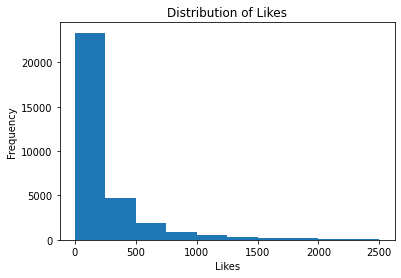

In [14]:
import matplotlib.pyplot as plt

plt.hist(data["Likes"],range=(0,2500))
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

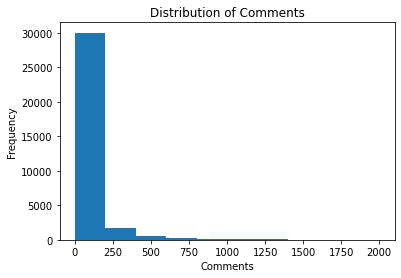

In [15]:
plt.hist(data["Comments"], range=(0,2000))
plt.title("Distribution of Comments")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()

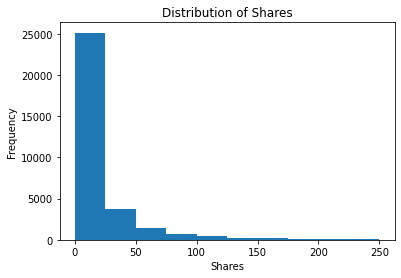

In [16]:
plt.hist(data["Shares"], range=(0,250))
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

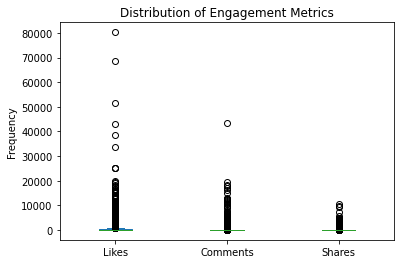

In [17]:
data[["Likes", "Comments", "Shares"]].plot.box()
plt.title("Distribution of Engagement Metrics")
plt.ylabel("Frequency")
plt.show()

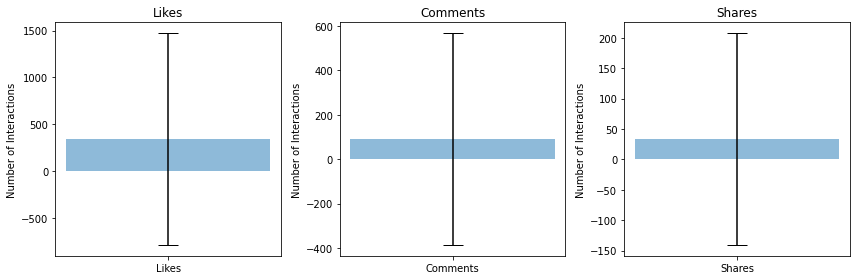

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].bar('Likes', data["Likes"].mean(), yerr=data["Likes"].std(), align='center', alpha=0.5, ecolor='black', capsize=10)
axs[0].set_ylabel("Number of Interactions")
axs[0].set_title("Likes")

axs[1].bar('Comments', data["Comments"].mean(), yerr=data["Comments"].std(), align='center', alpha=0.5, ecolor='black', capsize=10)
axs[1].set_ylabel("Number of Interactions")
axs[1].set_title("Comments")

axs[2].bar('Shares', data["Shares"].mean(), yerr=data["Shares"].std(), align='center', alpha=0.5, ecolor='black', capsize=10)
axs[2].set_ylabel("Number of Interactions")
axs[2].set_title("Shares")

fig.tight_layout()

plt.show()

In [19]:
display(data['Message'].isnull().sum())

nullText_type = data.loc[data['Message'].isnull()]
display(nullText_type['Type'].value_counts())


type_counts = data.groupby('Type').size()
display(data['Type'].value_counts())

442

Photo                   302
Native Video             44
Link                     39
Live Video Scheduled     39
Status                   12
Live Video Complete       5
YouTube                   1
Name: Type, dtype: int64

Photo                   23233
Native Video             5989
Link                     2894
Status                    584
YouTube                   152
Live Video Complete        45
Live Video Scheduled       44
Video                      10
Name: Type, dtype: int64

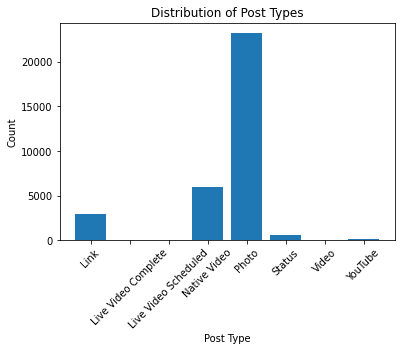

In [20]:
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Distribution of Post Types')
plt.xticks(rotation=45)
plt.show()

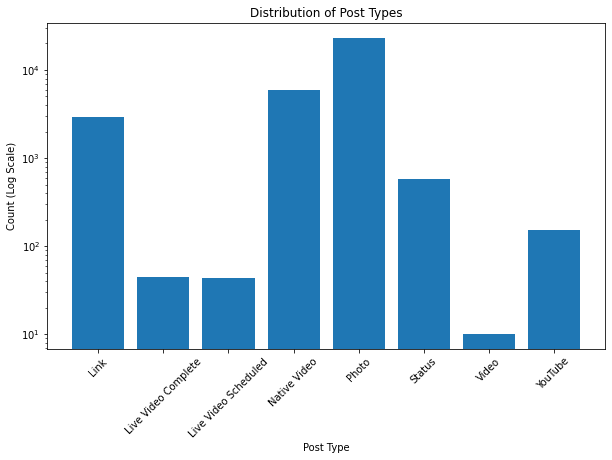

In [21]:
plt.figure(figsize=(10,6))
plt.bar(type_counts.index, type_counts.values, log=True)
plt.xlabel('Post Type')
plt.ylabel('Count (Log Scale)')
plt.title('Distribution of Post Types')
plt.xticks(rotation=45)
plt.show()

In [22]:
df = data[data['language']=='en']

def is_english(text):
    try:
        lang = detect(text)
    except:
        return False
    return lang == 'en'

df['Message'] = df['Message'].apply(lambda x: ' '.join(sentence for sentence in x.split('. ') if is_english(sentence)))


display(df.shape)
display(df['Message'].isnull().sum())
display(df['Type'].value_counts())

<ipython-input-22-b30bbaf624ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].apply(lambda x: ' '.join(sentence for sentence in x.split('. ') if is_english(sentence)))


(17361, 43)

0

Photo                   12232
Native Video             3529
Link                     1172
Status                    330
YouTube                    68
Live Video Complete        19
Video                       6
Live Video Scheduled        5
Name: Type, dtype: int64

In [23]:
df.isna().sum()

Page Name                                                                                                                 0
User Name                                                                                                               382
Facebook Id                                                                                                               0
Page Category                                                                                                           305
Page Admin Top Country                                                                                                   59
Page Description                                                                                                        305
Page Created                                                                                                            305
Likes at Posting                                                                                                        564
Follower

In [24]:
import sys
!{sys.executable} -m pip install wordcloud

# Cleaning the data

In [25]:
df = df.dropna(subset=['Followers at Posting'])
df.shape

(16738, 43)

In [26]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df_freq = df.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='D')])['Facebook Id'].count().reset_index(name='Post Count')
df_freq = df_freq.loc[df_freq['Post Created Date'] <= '2022-09-01']
summary_stats = df_freq.groupby('Page Name')['Post Count'].describe()
display(summary_stats)
display(df_freq)

<ipython-input-26-b0e542eab653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])


count      mean       std  min  25%  50%  75%  max
Page Name                                                                 
AIR CORSICA             223.0  1.143498  0.351368  1.0  1.0  1.0  1.0  2.0
Aegean Airlines         164.0  1.048780  0.216069  1.0  1.0  1.0  1.0  2.0
Aer Lingus               84.0  1.095238  0.333620  1.0  1.0  1.0  1.0  3.0
Aeroflot Airlines       244.0  1.081967  0.427264  1.0  1.0  1.0  1.0  6.0
Air Albania              14.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
...                       ...       ...       ...  ...  ...  ...  ...  ...
Wizz Air                708.0  1.878531  0.994720  1.0  1.0  2.0  2.0  6.0
airBaltic               585.0  1.461538  0.640238  1.0  1.0  1.0  2.0  4.0
albawings                39.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
easyJet                 203.0  1.251232  0.554849  1.0  1.0  1.0  1.0  4.0
ezgif-2-e50ee70d3e.gif    1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0

[74 rows x 8 columns]

Page Name Post Created Date  Post Count
0                 AIR CORSICA        2020-01-02           1
1                 AIR CORSICA        2020-01-03           1
2                 AIR CORSICA        2020-01-09           1
3                 AIR CORSICA        2020-01-10           1
4                 AIR CORSICA        2020-01-12           1
...                       ...               ...         ...
13662                 easyJet        2022-06-07           1
13663                 easyJet        2022-08-02           1
13664                 easyJet        2022-08-03           2
13665                 easyJet        2022-08-07           1
13676  ezgif-2-e50ee70d3e.gif        2020-06-15           1

[13275 rows x 3 columns]

In [27]:
df_freq.set_index('Post Created Date', inplace=True)
df_monthly = df_freq.resample('M').sum()
rolling_avg = df_monthly.rolling(window=3, min_periods=1).mean()
rolling_avg.reset_index(inplace=True)

<ipython-input-27-a759b691be56>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_freq.resample('M').sum()


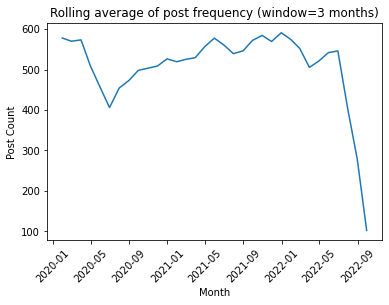

In [28]:
plt.plot(rolling_avg['Post Created Date'], rolling_avg['Post Count'])
plt.title('Rolling average of post frequency (window=3 months)')
plt.xlabel('Month')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
df['Overperforming Score'] = (df['Likes'] + df['Shares'] + df['Comments'] +
                              df['Love'] + df['Wow'] + df['Haha'] + df['Sad'] + df['Angry'] + df['Care']) / 9 / df['Followers at Posting']

df = df.sort_values(by='Overperforming Score', ascending=False)

print(df[['Message', 'Overperforming Score']].head(10))
print(df['Message'].iloc[0])

                                                 Message  Overperforming Score
4425   Where are you from? Show us your flag! 🇫🇴🥰 Hav...              0.086291
7793   When you look around you can only smile.😊 🏵🌸🇫🇴...              0.061997
6593   Is there a better place to love nature than th...              0.053821
11764  The brightness of nature in summer Is this you...              0.035395
3175   Waiting at the airport is normally boring UNLE...              0.029683
11769  The beautiful views from Bøur You don't need a...              0.027932
11771  The best way to start the week is up here.😍👏🌞 ...              0.027014
16363  Love is in the air this Valentine’s Day! 💛✈️ W...              0.022947
11775  Very beautiful places to explore 😍👏🇫🇴 Check ou...              0.021473
5037   We have officially touched down in #Orlando ⁦‪...              0.019622
Where are you from? Show us your flag! 🇫🇴🥰 Have a beautiful Friday! 📍Gásadalur, Vágar Check our routes at 👉 atlanticairways.com/en:

<ipython-input-29-2138c643710c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overperforming Score'] = (df['Likes'] + df['Shares'] + df['Comments'] +


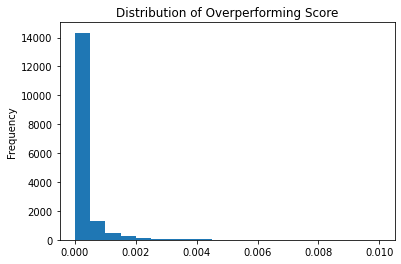

In [30]:
df['Overperforming Score'].plot.hist(bins=20, title='Distribution of Overperforming Score', range=(0,0.01))
plt.show()

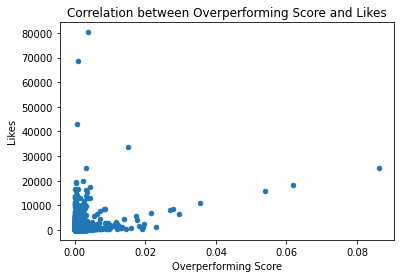

In [31]:
df.plot.scatter(x='Overperforming Score', y='Likes', title='Correlation between Overperforming Score and Likes')
plt.show()

In [32]:
df[['Message','Overperforming Score','Likes','Shares','Comments', 
                              'Love','Wow','Haha','Sad','Angry','Care']].tail(5)

Message  \
32924  Let's make up for lost time and book the holid...   
32923  Summer in The Algarve? Get ready to explore Po...   
32936  Sunnier days await… ☀️ Whether you're wanting ...   
32935  Beautiful weather, a vibrant culture and too m...   
32949  *** Further to our earlier post we are pleased...   

       Overperforming Score  Likes  Shares  Comments  Love  Wow  Haha  Sad  \
32924          3.315785e-07      2       0         0     0    0     0    0   
32923          3.312755e-07      2       0         0     0    0     0    0   
32936          1.680406e-07      1       0         0     0    0     0    0   
32935          1.657853e-07      1       0         0     0    0     0    0   
32949          0.000000e+00      0       0         0     0    0     0    0   

       Angry  Care  
32924      0     0  
32923      0     0  
32936      0     0  
32935      0     0  
32949      0     0

<AxesSubplot: xlabel='Followers at Posting', ylabel='Count'>

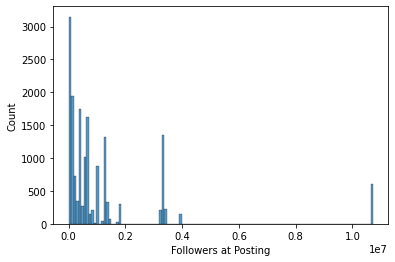

In [33]:
import seaborn as sns

sns.histplot(data=df, x='Followers at Posting')

<AxesSubplot: xlabel='Likes at Posting', ylabel='Count'>

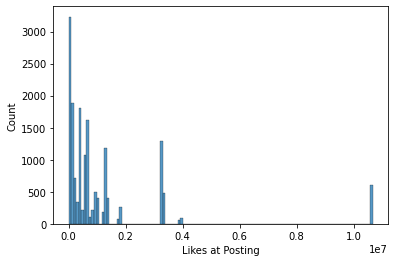

In [34]:
sns.histplot(data=df, x='Likes at Posting')

<ipython-input-35-63ce87f4bff7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['Followers at Posting','Total Interactions','Likes at Posting', 'Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].corr(method='pearson')


<AxesSubplot: >

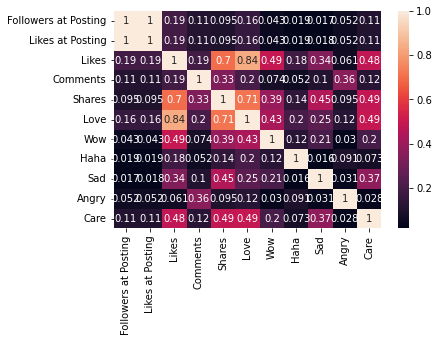

In [35]:
corr_matrix = df[['Followers at Posting','Total Interactions','Likes at Posting', 'Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot: xlabel='Love', ylabel='Likes'>

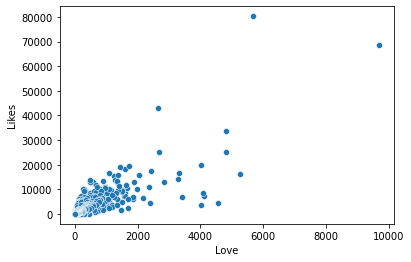

In [36]:
sns.scatterplot(data=df, x='Love', y='Likes')

<AxesSubplot: xlabel='Love', ylabel='Likes'>

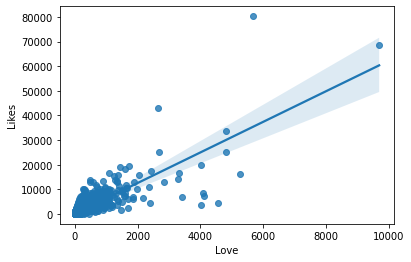

In [37]:
sns.regplot(data=df, x='Love', y='Likes')

<AxesSubplot: xlabel='Shares', ylabel='Love'>

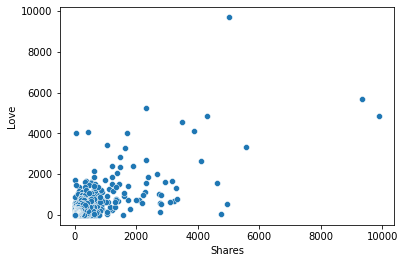

In [38]:
sns.scatterplot(data=df, x='Shares', y='Love')

<AxesSubplot: xlabel='Shares', ylabel='Love'>

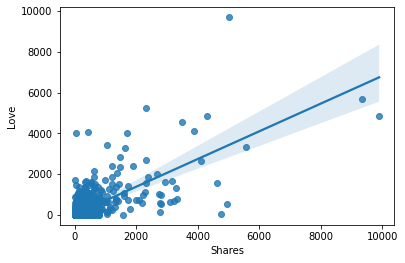

In [39]:
sns.regplot(data=df, x='Shares', y='Love')

In [40]:
df_sorted = df.sort_values(by=['Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )'], ascending=False)

top_10_posts = df_sorted.head(10)
display(top_10_posts)

Page Name                   User Name   Facebook Id  \
470           airBaltic                   airBaltic  1.019380e+11   
4425   Atlantic Airways             atlanticairways  1.555670e+14   
371     British Airways              britishairways  7.690343e+10   
87     Turkish Airlines             TurkishAirlines  9.043004e+10   
11770   Azores Airlines  SATAAzoresAirlinesOfficial  1.412380e+14   
18              easyJet                     easyJet  1.193692e+10   
7805    Azores Airlines  SATAAzoresAirlinesOfficial  1.412380e+14   
7793   Atlantic Airways             atlanticairways  1.555670e+14   
15              Volotea                     Volotea  1.999010e+14   
5715    Azores Airlines  SATAAzoresAirlinesOfficial  1.412380e+14   

        Page Category Page Admin Top Country  \
470           AIRLINE                     LV   
4425          AIRLINE                     FO   
371           AIRLINE                     GB   
87            AIRLINE                     TR   
11770         AIRLINE                     PT   
18     TRAVEL_COMPANY                     GB   
7805          AIRLINE                     PT   
7793          AIRLINE                     FO   
15            AIRLINE                     ES   
5715          AIRLINE                     PT   

                                        Page Description        Page Created  \
470    Welcome to the official Facebook page of airBa... 2009-04-28 16:51:00   
4425   Atlantic Airways is the national airline of th... 2010-09-22 15:29:00   
371    Welcome to our official Facebook page. This is... 2009-03-26 11:58:00   
87     Founded in 1933 with a modest fleet of 5 aircr... 2009-10-06 18:41:00   
11770  Bem-vindos a Bordo | Welcome aboard \nE-mail: ... 2010-09-14 13:39:00   
18     We’re here to help from 8am to 8pm GMT. You ca... 2008-04-19 13:29:00   
7805   Bem-vindos a Bordo | Welcome aboard \nE-mail: ... 2010-09-14 13:39:00   
7793   Atlantic Airways is the national airline of th... 2010-09-22 15:29:00   
15     Welcome aboard Volotea’s Facebook Page! \nCont... 2011-12-16 23:16:00   
5715   Bem-vindos a Bordo | Welcome aboard \nE-mail: ... 2010-09-14 13:39:00   

       Likes at Posting  Followers at Posting             Post Created  ...  \
470            370784.0              377208.0  2020-10-09 04:31:31 EDT  ...   
4425            40222.0               40930.0  2020-09-11 06:42:38 EDT  ...   
371           3260569.0             3278355.0  2020-12-11 13:48:00 EST  ...   
87           10631120.0            10693823.0  2022-02-05 11:07:36 EST  ...   
11770          125945.0              129834.0  2021-12-17 12:56:38 EST  ...   
18            1748268.0             1765455.0  2020-05-26 02:27:42 EDT  ...   
7805           125951.0              129841.0  2021-12-19 07:00:00 EST  ...   
7793            39540.0               40572.0  2020-08-14 06:13:42 EDT  ...   
15             257854.0              264589.0  2020-07-23 07:00:02 EDT  ...   
5715           125900.0              129720.0  2021-11-15 10:00:01 EST  ...   

                                               Link Text Description  \
470    airBaltic participates in #JerusalemaDanceChal...         NaN   
4425                                                 NaN         NaN   
371                                                  NaN         NaN   
87                  First To The Gate - Turkish Airlines         NaN   
11770                                                NaN         NaN   
18                            Your wellbeing this summer         NaN   
7805                                                 NaN         NaN   
7793                                     Timeline photos         NaN   
15         Guidelines to make your trip safer than ever!         NaN   
5715                                                 NaN         NaN   

      Sponsor Id Sponsor Name  Sponsor Category  \
470          NaN          NaN               NaN   
4425         NaN          NaN               NaN   
371          NaN          Na

<AxesSubplot: xlabel='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )', ylabel='Count'>

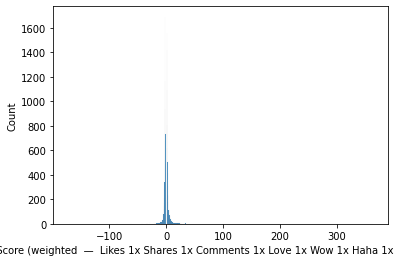

In [41]:
sns.histplot(data=df, x='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )')

<AxesSubplot: xlabel='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )', ylabel='Density'>

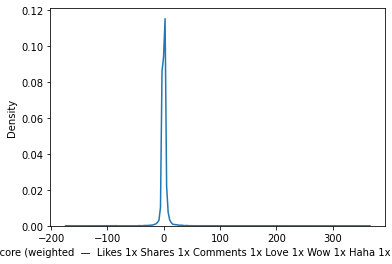

In [42]:
sns.kdeplot(data=df, x='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )')

<AxesSubplot: ylabel='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )'>

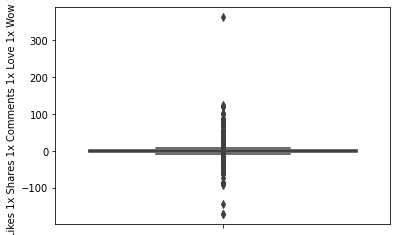

In [43]:
sns.boxplot(data=df, y='Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )')

# Evaluation methods

In [44]:
df.isna().sum()

Page Name                                                                                                                 0
User Name                                                                                                               382
Facebook Id                                                                                                               0
Page Category                                                                                                             0
Page Admin Top Country                                                                                                    0
Page Description                                                                                                          0
Page Created                                                                                                              0
Likes at Posting                                                                                                          0
Follower

In [45]:
df_zeros = (df==0).sum()
df_zeros

Page Name                                                                                                                 0
User Name                                                                                                                 0
Facebook Id                                                                                                               0
Page Category                                                                                                             0
Page Admin Top Country                                                                                                    0
Page Description                                                                                                          0
Page Created                                                                                                              0
Likes at Posting                                                                                                          0
Follower

In [46]:
display(df.shape)
df_s = df.drop(index = df[df['Shares']==0].index)
df_s_zeros = (df_s==0).sum()
display(df_s_zeros)
df_s.shape

(16738, 44)

Page Name                                                                                                                 0
User Name                                                                                                                 0
Facebook Id                                                                                                               0
Page Category                                                                                                             0
Page Admin Top Country                                                                                                    0
Page Description                                                                                                          0
Page Created                                                                                                              0
Likes at Posting                                                                                                          0
Follower

(15642, 44)

In [47]:
df = df[['Page Name','Page Admin Top Country','Page Created', 'Likes at Posting', 'Followers at Posting',
        'Post Created Date', 'Post Created Time','Type','Total Interactions', 'Likes', 'Comments', 'Shares','Love','Wow','Haha',
        'Sad','Angry','Care','Post Views','Total Views','Message','Description','Image Text','Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
        'Page Created Date','language','Overperforming Score']]

df['Total Interactions'] = df['Total Interactions'].str.replace(',', '').astype(float)
df['Total Interactions'] = df.groupby('Page Name')['Total Interactions'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-47-2976d598c207>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Interactions'] = df['Total Interactions'].str.replace(',', '').astype(float)
<ipython-input-47-2976d598c207>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Interactions'] = df.groupby('Page Name')['Total Interactions'].transform(lambda x: x.fillna(x.mean()))


In [48]:
def brand_popularity(d, start, end, significant_changes):
    
    df = d
    start_date = start
    end_date = end
    df_filtered = df.loc[(df['Post Created Date'] >= start_date) & (df['Post Created Date'] <= end_date)]

    interaction_weight = 0.333
    follower_weight = 0.333
    likes_at_posting_weight = 0.333
    
    df_filtered = df_filtered.copy()
    df_filtered['Followers at Posting'] = pd.to_numeric(df_filtered['Followers at Posting'], errors='coerce')
    df_filtered['Total Interactions'] = pd.to_numeric(df_filtered['Total Interactions'], errors='coerce')
    df_filtered['Likes at Posting'] = pd.to_numeric(df_filtered['Likes at Posting'], errors='coerce')

    df_filtered['Popularity Weighted Score'] = (df_filtered['Total Interactions'] * interaction_weight) + \
                                (df_filtered['Followers at Posting'] * follower_weight) + \
                                (df_filtered['Likes at Posting'] * likes_at_posting_weight)                                

    df_filtered = df_filtered.loc[df_filtered['Page Name'].isin(significant_changes.index)]

    total_weighted_score = df_filtered['Popularity Weighted Score'].sum()
    # print('Total popularity weighted score: ' , total_weighted_score)

    average_weighted_score_per_post = df_filtered['Popularity Weighted Score'].mean()
    print('Average Popularity weighted score: ' ,average_weighted_score_per_post)
    
    
    max_interaction_weighted_score = df_filtered['Total Interactions'].max() * interaction_weight
    max_follower_weighted_score = df_filtered['Followers at Posting'].max() * follower_weight
    max_likes_weighted_score = df_filtered['Likes at Posting'].max() * likes_at_posting_weight
    max_possible_score = max_interaction_weighted_score + max_follower_weighted_score + max_likes_weighted_score

    # total_weighted_score_scaled = total_weighted_score / max_possible_score
    average_weighted_score_per_post_scaled = average_weighted_score_per_post / max_possible_score
    
    # print("max Possible popularity score: " ,max_possible_score)
    # print('Total weighted score (scaled): ' , total_weighted_score_scaled)
    print('Average Popularity weighted score (scaled): ' , average_weighted_score_per_post_scaled)

    return df_filtered, average_weighted_score_per_post_scaled

In [49]:
from sklearn.preprocessing import MinMaxScaler

def brand_engagement(d, start, end, significant_changes):
    
    df = d
    start_date = start
    end_date = end

    df_filtered = df[(df['Post Created Date'] >= start_date) & (df['Post Created Date'] <= end_date)]
    
    like_weight = 0.5
    comment_weight = 0.1
    share_weight = 0.4
    
    df_filtered = df_filtered.copy()
    df_filtered['Likes'] = pd.to_numeric(df_filtered['Likes'], errors='coerce')
    df_filtered['Comments'] = pd.to_numeric(df_filtered['Comments'], errors='coerce')
    df_filtered['Shares'] = pd.to_numeric(df_filtered['Shares'], errors='coerce')
    df_filtered['Followers at Posting'] = pd.to_numeric(df_filtered['Followers at Posting'], errors='coerce')
    
    df_filtered['Engagement Rate'] = (df_filtered['Likes']*like_weight + df_filtered['Comments']*comment_weight
                                    + df_filtered['Shares']*share_weight) / df_filtered['Followers at Posting']
    
    df_filtered = df_filtered.loc[df_filtered['Page Name'].isin(significant_changes.index)]

    scaler = MinMaxScaler()
    df_filtered['Engagement Rate'] = scaler.fit_transform(df_filtered['Engagement Rate'].values.reshape(-1, 1))

    avg_engagement_rate = df_filtered['Engagement Rate'].mean()
    print("Average engagement rate: ", avg_engagement_rate)
    
    return df_filtered, avg_engagement_rate


In [50]:
def post_engagement(df):
    
    like_weight = 0.5
    comment_weight = 0.1
    share_weight = 0.4
    
    df = df.copy()
    df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
    df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')
    df['Shares'] = pd.to_numeric(df['Shares'], errors='coerce')
    df['Followers at Posting'] = pd.to_numeric(df['Followers at Posting'], errors='coerce')
    df['Likes at Posting'] = pd.to_numeric(df['Likes at Posting'], errors='coerce')

    
    df['Post Engagement Rate'] = (df['Likes']*like_weight + df['Comments']*comment_weight
                                    + df['Shares']*share_weight) / df['Followers at Posting']
    
    scaler = MinMaxScaler()
    df['Post Engagement Rate'] = scaler.fit_transform(df['Post Engagement Rate'].values.reshape(-1, 1))
    # df['Post Engagement Rate'] = np.log1p(df['Post Engagement Rate'])

    return df

def post_popularity(df):
    
    interaction_weight = 0.333
    follower_weight = 0.333
    likes_at_posting_weight = 0.333
    
    df = df.copy()
    df['Followers at Posting'] = pd.to_numeric(df['Followers at Posting'], errors='coerce')
    df['Total Interactions'] = pd.to_numeric(df['Total Interactions'], errors='coerce')
    df['Likes at Posting'] = pd.to_numeric(df['Likes at Posting'], errors='coerce')

    df['Post Popularity Weighted Score'] = (df['Total Interactions'] * interaction_weight) + (df['Followers at Posting'] * follower_weight) +(df['Likes at Posting'] * likes_at_posting_weight)
                                 
    df['Post Scaled Popularity Score'] = df.groupby('Page Name')['Post Popularity Weighted Score'].transform(lambda x: x/x.max())

    return df

# Data separation

In [51]:
df_post_count = df.groupby(['Page Name']).size().reset_index(name='Number of Posts')

df_post_count = df_post_count.sort_values(by='Number of Posts', ascending=False)
less_than = df_post_count[df_post_count['Number of Posts']<36]
print(len(less_than))
print(len(df_post_count))
print(df_post_count.mean())
print(df_post_count.std())

21
74
Number of Posts    226.189189
dtype: float64
Number of Posts    266.603994
dtype: float64


<ipython-input-51-e1a18bf631a1>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_post_count.mean())
<ipython-input-51-e1a18bf631a1>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_post_count.std())


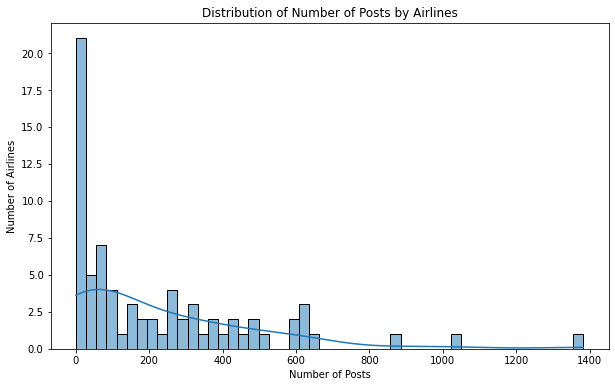

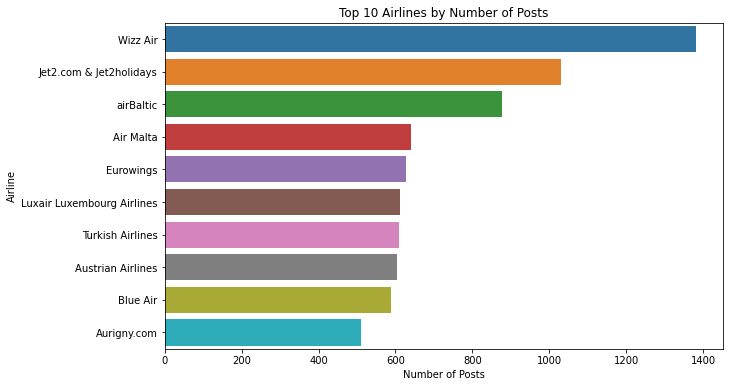

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_post_count, x='Number of Posts', bins=50, kde=True)
plt.title('Distribution of Number of Posts by Airlines')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Airlines')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Posts', y='Page Name', data=df_post_count.head(10), orient='h')
plt.title('Top 10 Airlines by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Airline')
plt.show()


In [53]:
df = df[~df['Page Name'].isin(less_than['Page Name'])]
df['Page Name'].nunique()

53

In [54]:
avg_followers = df.groupby(['Page Name'])['Followers at Posting'].mean()
avg_followers = avg_followers.sort_values(ascending=False)
avg = avg_followers.iloc[:20]

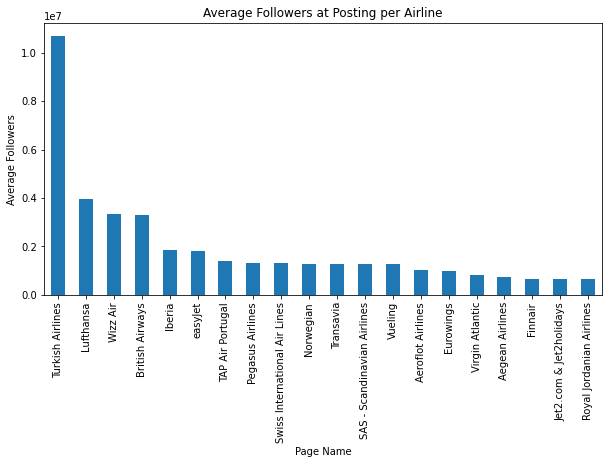

In [55]:
plt.figure(figsize=(10, 5))
avg.plot(kind='bar')
plt.title('Average Followers at Posting per Airline')
plt.ylabel('Average Followers')
# plt.xticks(rotation=45)
plt.show()

In [56]:
avg_likes = df.groupby(['Page Name'])['Likes at Posting'].mean()

avg_likes = avg_likes.sort_values(ascending=False)

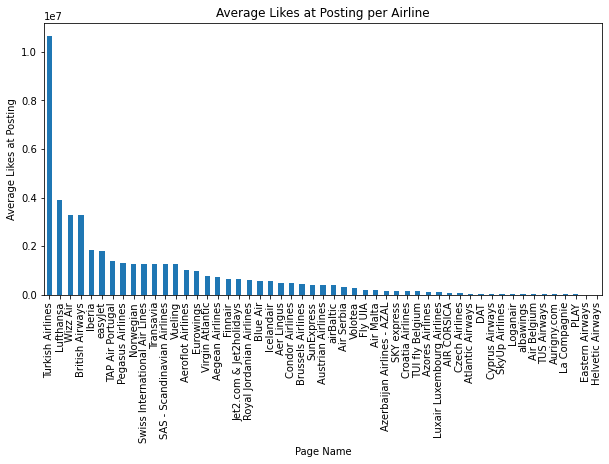

In [57]:
plt.figure(figsize=(10, 5))
avg_likes.plot(kind='bar')
plt.title('Average Likes at Posting per Airline')
plt.ylabel('Average Likes at Posting')
plt.show()

In [58]:
from sklearn.cluster import KMeans

X = df[['Likes at Posting', 'Followers at Posting']]

kmeans = KMeans(n_clusters=2)
df['Size'] = kmeans.fit_predict(X)
df_big = df.loc[df['Size']==1]
df_big['Page Name'].unique()

<ipython-input-58-aa62b31c4de5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = kmeans.fit_predict(X)


array(['Turkish Airlines'], dtype=object)

In [59]:
thr = avg_followers.quantile(0.8)

bigger_airlines = avg_followers[avg_followers>thr]
bigger_airlines = bigger_airlines.sort_values(ascending=False)
display(len(bigger_airlines))
display(df['Page Name'].nunique())
display(bigger_airlines)


11

53

Page Name
Turkish Airlines                 1.069826e+07
Lufthansa                        3.943462e+06
Wizz Air                         3.322747e+06
British Airways                  3.301912e+06
Iberia                           1.831813e+06
easyJet                          1.806141e+06
TAP Air Portugal                 1.406988e+06
Pegasus Airlines                 1.324992e+06
Swiss International Air Lines    1.299920e+06
Norwegian                        1.291098e+06
Transavia                        1.282021e+06
Name: Followers at Posting, dtype: float64

In [60]:
df['Size'] = df['Page Name'].apply(lambda x: 1 if x in bigger_airlines.index else 0)

<ipython-input-60-66de5304eeee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Page Name'].apply(lambda x: 1 if x in bigger_airlines.index else 0)


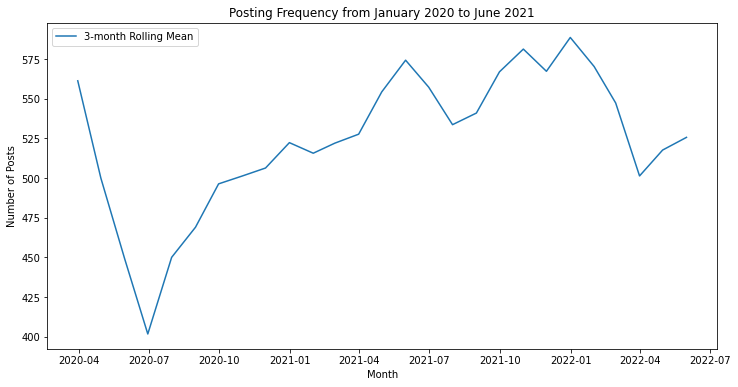

In [61]:
start_date = '2020-01-01'
end_date = '2022-05-30'
df_period = df[(df['Post Created Date'] >= start_date) & (df['Post Created Date'] <= end_date)]

posts_per_day = df_period.groupby('Post Created Date')['Page Name'].count()

posts_per_month = df_period.resample('M', on='Post Created Date')['Page Name'].count()
rolling_mean = posts_per_month.rolling(window=3).mean()

plt.figure(figsize=(12,6))
# plt.plot(posts_per_month, label='Monthly Posts')
plt.plot(rolling_mean, label='3-month Rolling Mean')
plt.title("Posting Frequency from January 2020 to June 2021")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()

In [62]:
from scipy.stats import ttest_ind

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

df_period_1 = df[(df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
df_period_2 = df[(df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]
airlines = df['Page Name'].unique()

test_results = pd.DataFrame(columns=['t-statistic', 'p-value'], dtype=float)
test_results.index.name = 'Page Name'

for airline in airlines:
    posting_freq_period_1 = df_period_1[df_period_1['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)
    posting_freq_period_2 = df_period_2[df_period_2['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)

    mean_posting_freq_period_1 = posting_freq_period_1.mean()
    mean_posting_freq_period_2 = posting_freq_period_2.mean()

    if mean_posting_freq_period_1 < 10 and mean_posting_freq_period_2 < 10:
        continue

    t_stat, p_val = ttest_ind(posting_freq_period_1, posting_freq_period_2)
    test_results.loc[airline] = [t_stat, p_val]

significant_changes_ttest = test_results[test_results['p-value'] < 0.05]
significant_changes_ttest = significant_changes_ttest.sort_values('p-value')


print('Most significant change:')
print(significant_changes_ttest)


Most significant change:
                             t-statistic   p-value
Page Name                                         
Vueling                        -5.012870  0.000237
Jet2.com & Jet2holidays        -3.764760  0.001874
SAS - Scandinavian Airlines     3.653712  0.002917
British Airways                -3.041639  0.009451
Atlantic Airways               -2.966053  0.009614
Air Serbia                      2.892970  0.012576
Wizz Air                       -2.222305  0.042064
Blue Air                       -2.235093  0.043590


In [63]:
bigger_airlines_list = bigger_airlines.index.tolist()

test_results_big = pd.DataFrame(columns=['t-statistic', 'p-value'], dtype=float)
test_results_big.index.name = 'Page Name'

for airline in bigger_airlines_list:
    posting_freq_period_1 = df_period_1[df_period_1['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)
    posting_freq_period_2 = df_period_2[df_period_2['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)

    mean_posting_freq_period_1 = posting_freq_period_1.mean()
    mean_posting_freq_period_2 = posting_freq_period_2.mean()

    if mean_posting_freq_period_1 < 10 and mean_posting_freq_period_2 < 10:
        continue

    t_stat, p_val = ttest_ind(posting_freq_period_1, posting_freq_period_2)
    test_results_big.loc[airline] = [t_stat, p_val]

significant_changes_ttest_big = test_results_big[test_results_big['p-value'] < 0.05]
significant_changes_ttest_big = significant_changes_ttest_big.sort_values('p-value')

print('Most significant change for bigger airlines:')
print(significant_changes_ttest_big)



smaller_airlines_list = set(airlines) - set(bigger_airlines_list)

test_results_small = pd.DataFrame(columns=['t-statistic', 'p-value'], dtype=float)
test_results_small.index.name = 'Page Name'

for airline in smaller_airlines_list:
    posting_freq_period_1 = df_period_1[df_period_1['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)
    posting_freq_period_2 = df_period_2[df_period_2['Page Name'] == airline].groupby(pd.Grouper(key='Post Created Date', freq='M')).size().fillna(0)

    mean_posting_freq_period_1 = posting_freq_period_1.mean()
    mean_posting_freq_period_2 = posting_freq_period_2.mean()

    if mean_posting_freq_period_1 < 10 and mean_posting_freq_period_2 < 10:
        continue

    t_stat, p_val = ttest_ind(posting_freq_period_1, posting_freq_period_2)
    test_results_small.loc[airline] = [t_stat, p_val] # Use test_results_small

significant_changes_ttest_small = test_results_small[test_results_small['p-value'] < 0.05]
significant_changes_ttest_small = significant_changes_ttest_small.sort_values('p-value')

print(' ')
print('Most significant change for smaller airlines:')
print(significant_changes_ttest_small)

Most significant change for bigger airlines:
                 t-statistic   p-value
Page Name                             
British Airways    -3.041639  0.009451
Wizz Air           -2.222305  0.042064
 
Most significant change for smaller airlines:
                             t-statistic   p-value
Page Name                                         
Vueling                        -5.012870  0.000237
Jet2.com & Jet2holidays        -3.764760  0.001874
SAS - Scandinavian Airlines     3.653712  0.002917
Atlantic Airways               -2.966053  0.009614
Air Serbia                      2.892970  0.012576
Blue Air                       -2.235093  0.043590


In [64]:
from scipy.stats import mannwhitneyu

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

df_period_1 = df[(df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
df_period_2 = df[(df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]
airlines = df['Page Name'].unique()

posting_freq_period_1 = df_period_1.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)
posting_freq_period_2 = df_period_2.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)

mean_posting_freq_period_1 = posting_freq_period_1.mean(axis=1)
mean_posting_freq_period_2 = posting_freq_period_2.mean(axis=1)

airlines_to_drop = mean_posting_freq_period_1[(mean_posting_freq_period_1 < 10) & (mean_posting_freq_period_2 < 10)].index
posting_freq_period_1 = posting_freq_period_1.drop(airlines_to_drop, axis=0)
posting_freq_period_2 = posting_freq_period_2.drop(airlines_to_drop, axis=0)

test_results = pd.DataFrame(columns=['U Statistic', 'p-value'], dtype=float)
test_results.index.name = 'Page Name'

for airline in airlines:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    u_stat, p_val = mannwhitneyu(posting_freq_period_1.loc[airline], posting_freq_period_2.loc[airline])
    test_results.loc[airline] = [u_stat, p_val]

significant_changes_mw = test_results[test_results['p-value'] < 0.05]

display(significant_changes_mw)
display(significant_changes_mw.shape)
display(posting_freq_period_1.loc['British Airways'])
display(posting_freq_period_2.loc['British Airways'])

U Statistic   p-value
Page Name                                     
Atlantic Airways                12.0  0.027341
Azores Airlines                 12.5  0.031377
Austrian Airlines               11.5  0.024180
British Airways                 13.0  0.035097
Jet2.com & Jet2holidays          7.0  0.004628
Eurowings                       57.0  0.035322
Wizz Air                        10.0  0.016738
Vueling                          7.0  0.006927

(8, 2)

Post Created Date
2020-03-31    12
2020-04-30     4
2020-05-31     2
2020-06-30     2
2020-07-31    11
2020-08-31     7
2020-09-30     0
Freq: M, Name: British Airways, dtype: int64

Post Created Date
2020-09-30    14
2020-10-31    11
2020-11-30     9
2020-12-31     8
2021-01-31    12
2021-02-28    12
2021-03-31    21
2021-04-30    17
2021-05-31    22
2021-06-30     0
Freq: M, Name: British Airways, dtype: int64

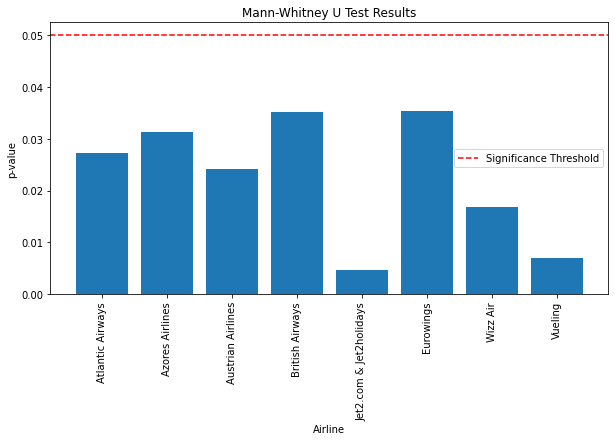

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(significant_changes_mw.index, significant_changes_mw['p-value'])
ax.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold')
ax.set_xlabel('Airline')
ax.set_ylabel('p-value')
ax.set_title('Mann-Whitney U Test Results')
ax.legend()
plt.xticks(rotation=90)
plt.show()

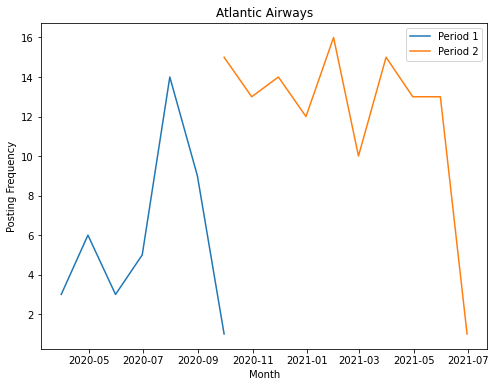

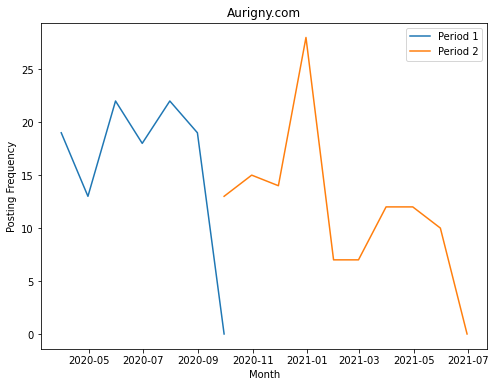

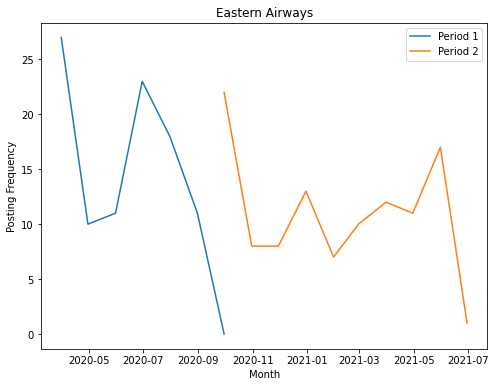

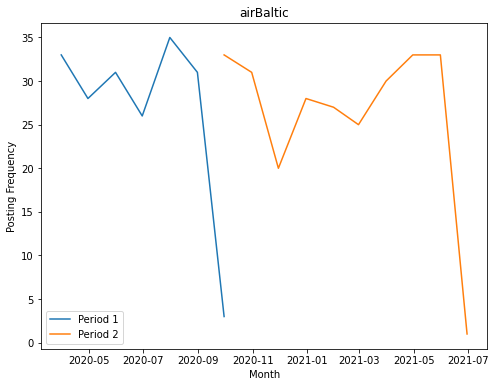

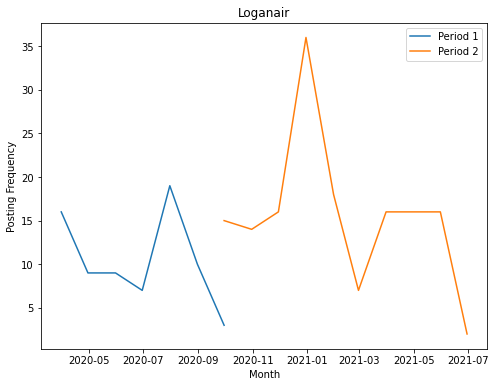

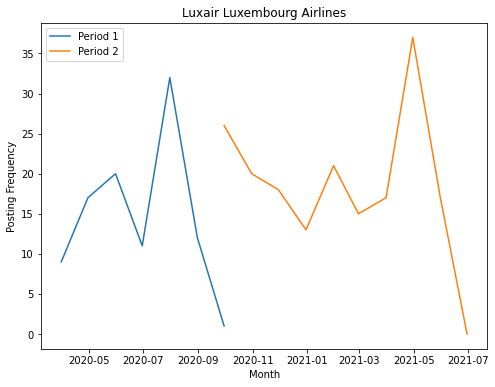

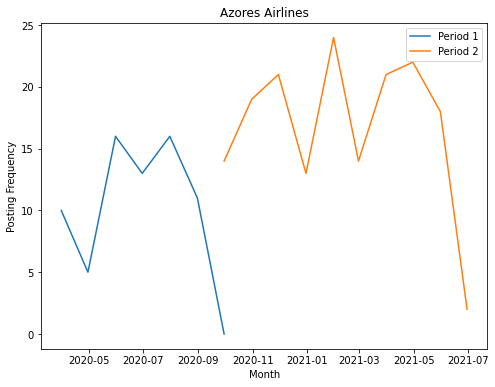

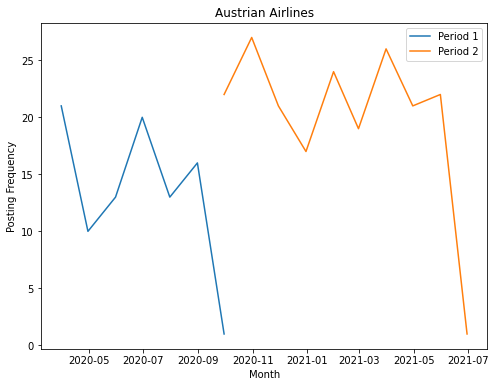

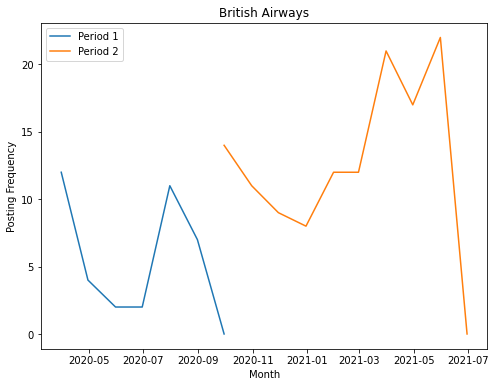

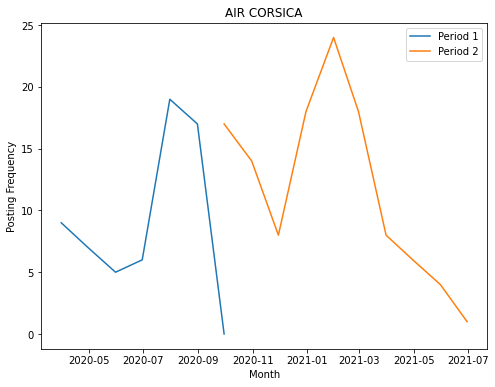

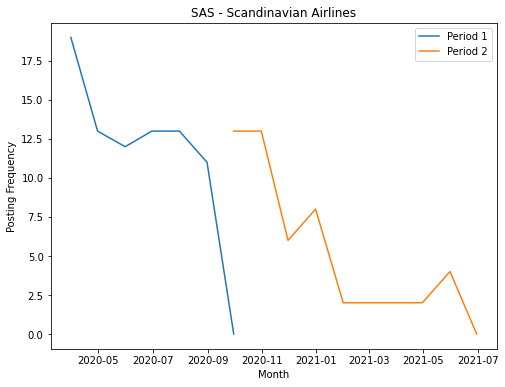

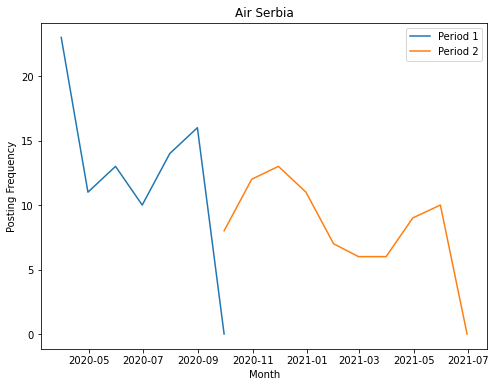

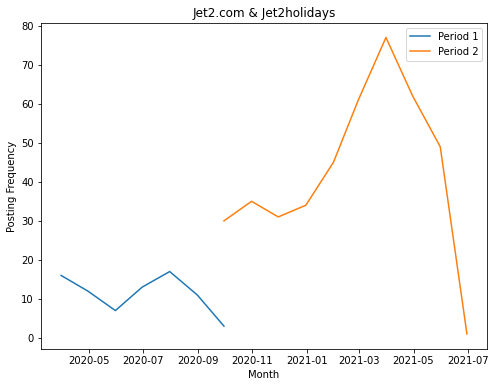

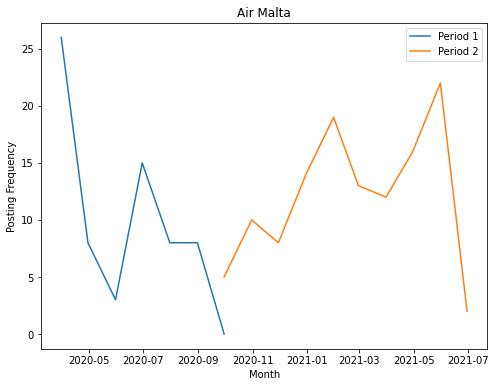

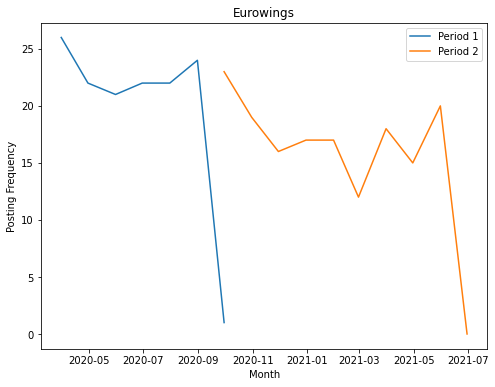

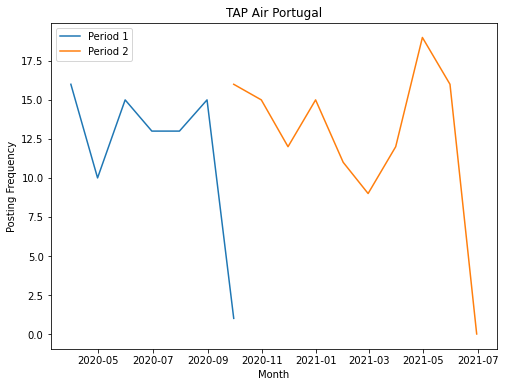

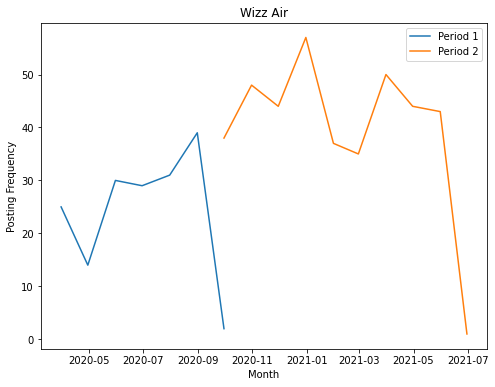

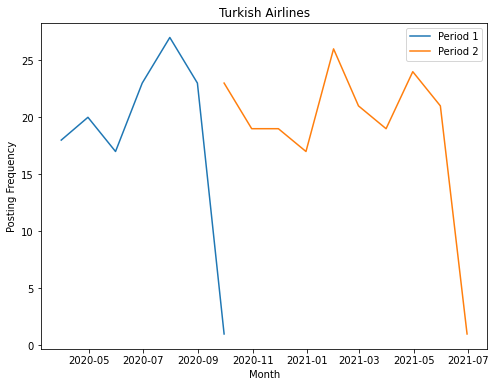

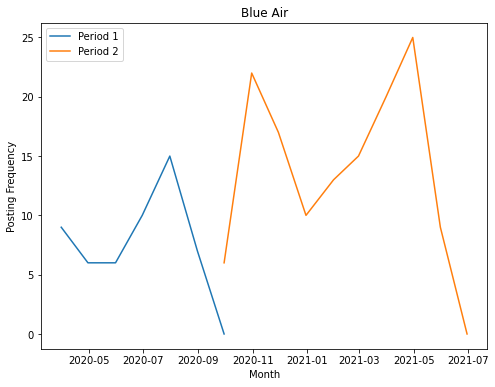

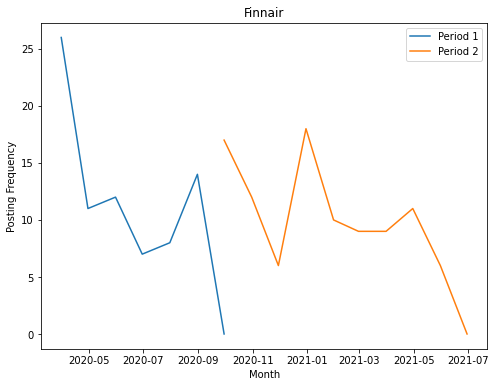

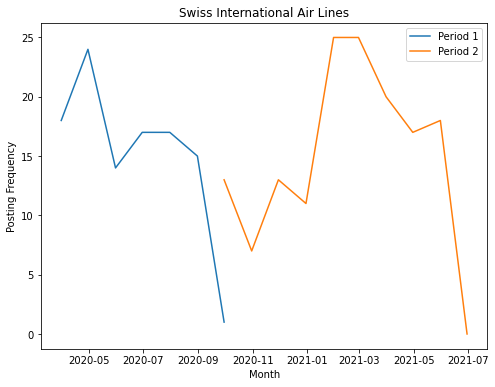

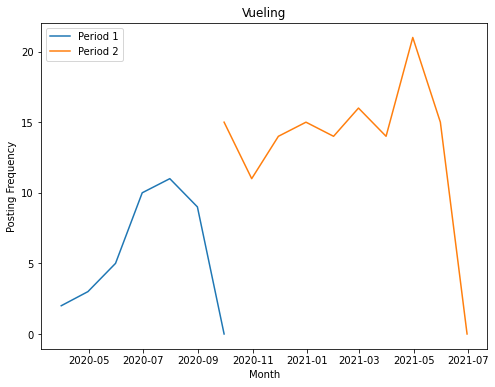

In [66]:
for airline in airlines:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(posting_freq_period_1.loc[airline], label='Period 1')
    ax.plot(posting_freq_period_2.loc[airline], label='Period 2')
    ax.set_title(airline)
    ax.set_xlabel('Month')
    ax.set_ylabel('Posting Frequency')
    ax.legend()
    plt.show()

In [67]:
from scipy.stats import ranksums

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

df_period_1 = df[(df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
df_period_2 = df[(df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]
airlines = df['Page Name'].unique()

posting_freq_period_1 = df_period_1.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)
posting_freq_period_2 = df_period_2.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)

posting_freq_period_1 = posting_freq_period_1.loc[posting_freq_period_1.sum(axis=1) >= 10]
posting_freq_period_2 = posting_freq_period_2.loc[posting_freq_period_2.sum(axis=1) >= 10]

test_results = pd.DataFrame(columns=['W Statistic', 'p-value'], dtype=float)
test_results.index.name = 'Page Name'

for airline in airlines:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    w_stat, p_val = ranksums(posting_freq_period_1.loc[airline], posting_freq_period_2.loc[airline])
    test_results.loc[airline] = [w_stat, p_val]

significant_changes_ranksum = test_results[test_results['p-value'] < 0.05]
non_significant_changes_ranksum = test_results.drop(significant_changes_ranksum.index)

display(significant_changes_ranksum)
display(significant_changes_ranksum.shape)
display(posting_freq_period_1.loc['Vueling'])
display(posting_freq_period_2.loc['Vueling'])

W Statistic   p-value
Page Name                                     
Atlantic Airways           -2.244570  0.024796
Azores Airlines            -2.195775  0.028108
Icelandair                 -2.000595  0.045436
Austrian Airlines          -2.293365  0.021827
British Airways            -2.146980  0.031795
Jet2.com & Jet2holidays    -2.732520  0.006285
Eurowings                   2.146980  0.031795
Wizz Air                   -2.439750  0.014697
Vueling                    -2.732520  0.006285

(9, 2)

Post Created Date
2020-03-31     2
2020-04-30     3
2020-05-31     5
2020-06-30    10
2020-07-31    11
2020-08-31     9
2020-09-30     0
Freq: M, Name: Vueling, dtype: int64

Post Created Date
2020-09-30    15
2020-10-31    11
2020-11-30    14
2020-12-31    15
2021-01-31    14
2021-02-28    16
2021-03-31    14
2021-04-30    21
2021-05-31    15
2021-06-30     0
Freq: M, Name: Vueling, dtype: int64

In [68]:
from scipy.stats import ranksums

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

df_period_1 = df[(df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
df_period_2 = df[(df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]
airlines = df['Page Name'].unique()

posting_freq_period_1 = df_period_1.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)
posting_freq_period_2 = df_period_2.groupby(['Page Name', pd.Grouper(key='Post Created Date', freq='M')]).size().unstack(fill_value=0)

posting_freq_period_1 = posting_freq_period_1.loc[posting_freq_period_1.sum(axis=1) >= 10]
posting_freq_period_2 = posting_freq_period_2.loc[posting_freq_period_2.sum(axis=1) >= 10]

test_results_big = pd.DataFrame(columns=['W Statistic', 'p-value'], dtype=float)
test_results_big.index.name = 'Page Name'

for airline in bigger_airlines_list:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    w_stat, p_val = ranksums(posting_freq_period_1.loc[airline], posting_freq_period_2.loc[airline])
    test_results_big.loc[airline] = [w_stat, p_val]

significant_changes_ranksum_big = test_results_big[test_results_big['p-value'] < 0.05]
non_significant_changes_ranksum_big = test_results.drop(significant_changes_ranksum_big.index)


print('Significant changes for bigger airlines:')
display(significant_changes_ranksum_big)

test_results_small = pd.DataFrame(columns=['W Statistic', 'p-value'], dtype=float)
test_results_small.index.name = 'Page Name'

for airline in smaller_airlines_list:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    w_stat, p_val = ranksums(posting_freq_period_1.loc[airline], posting_freq_period_2.loc[airline])
    test_results_small.loc[airline] = [w_stat, p_val]

significant_changes_ranksum_small = test_results_small[test_results_small['p-value'] < 0.05]
non_significant_changes_ranksum_small = test_results.drop(significant_changes_ranksum_small.index)

print('Significant changes for smaller airlines:')
display(significant_changes_ranksum_small)


Significant changes for bigger airlines:


W Statistic   p-value
Page Name                             
Wizz Air            -2.43975  0.014697
British Airways     -2.14698  0.031795

Significant changes for smaller airlines:


W Statistic   p-value
Page Name                                     
Atlantic Airways           -2.244570  0.024796
Jet2.com & Jet2holidays    -2.732520  0.006285
Azores Airlines            -2.195775  0.028108
Eurowings                   2.146980  0.031795
Icelandair                 -2.000595  0.045436
Austrian Airlines          -2.293365  0.021827
Vueling                    -2.732520  0.006285

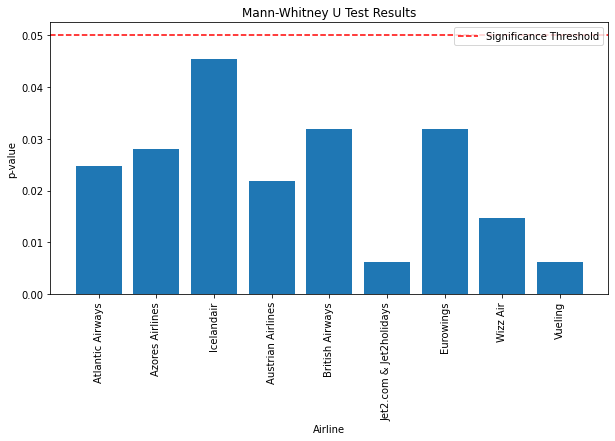

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(significant_changes_ranksum.index, significant_changes_ranksum['p-value'])
ax.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold')
ax.set_xlabel('Airline')
ax.set_ylabel('p-value')
ax.set_title('Mann-Whitney U Test Results')
ax.legend()
plt.xticks(rotation=90)
plt.show()

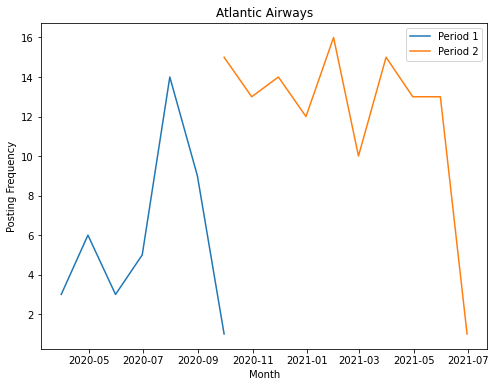

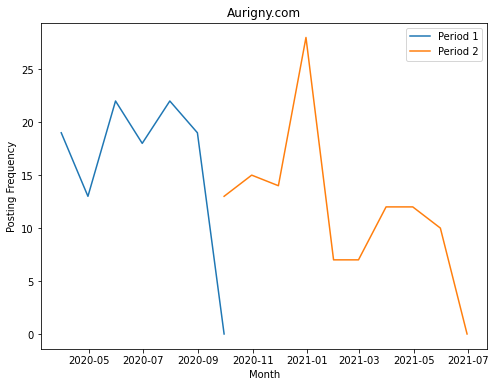

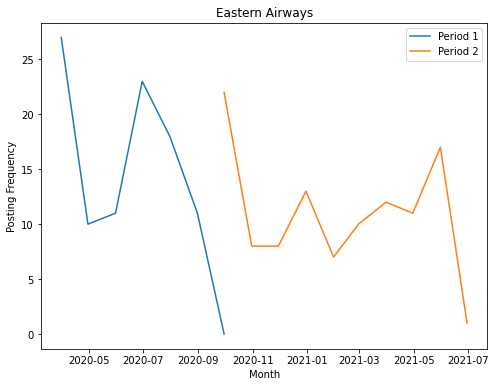

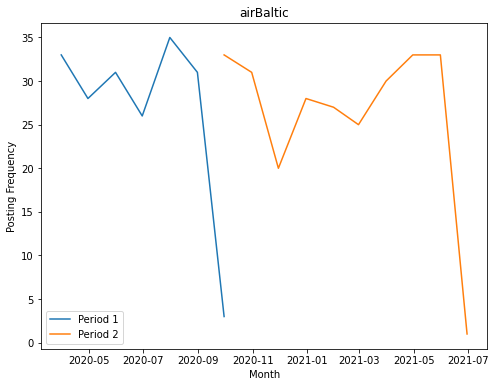

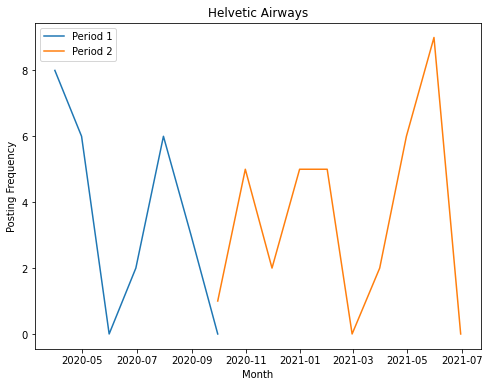

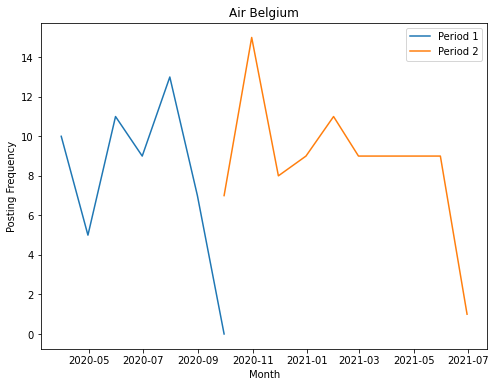

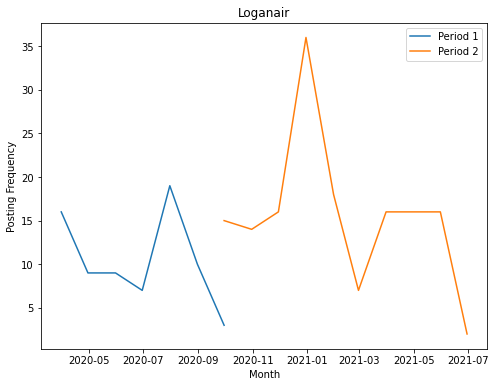

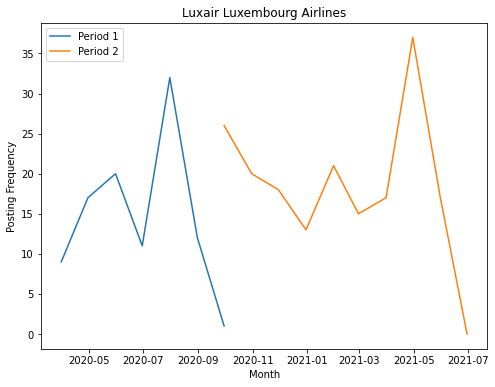

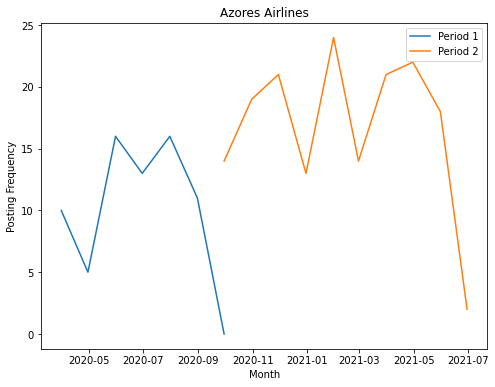

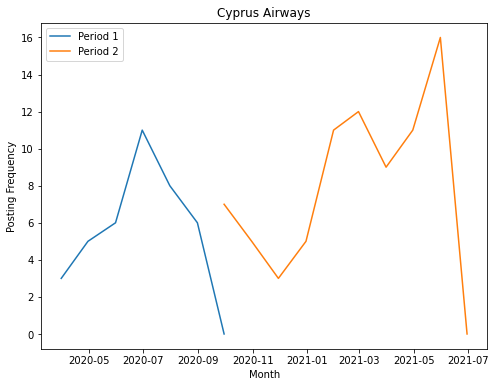

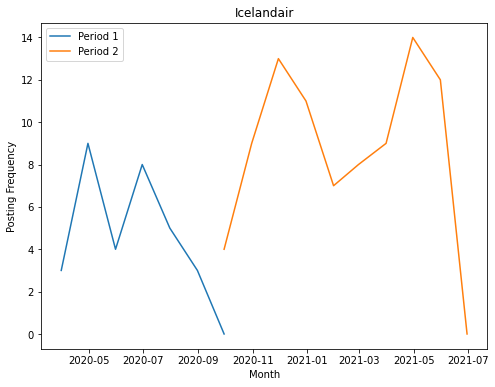

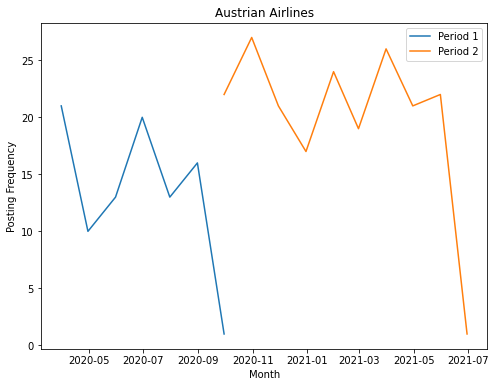

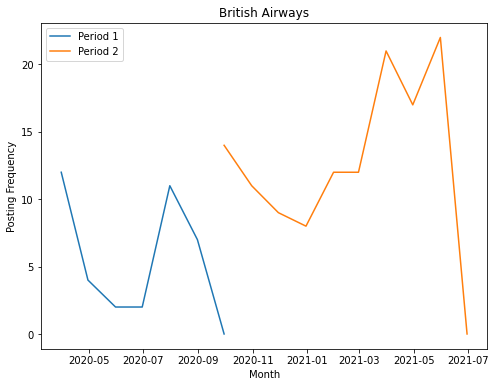

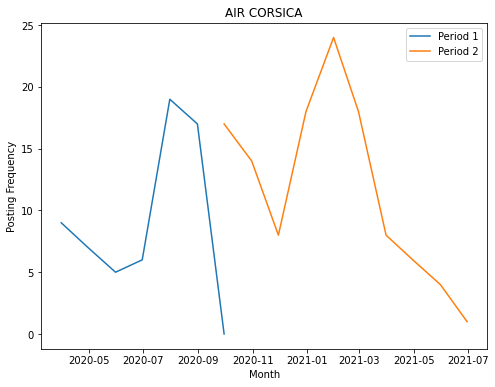

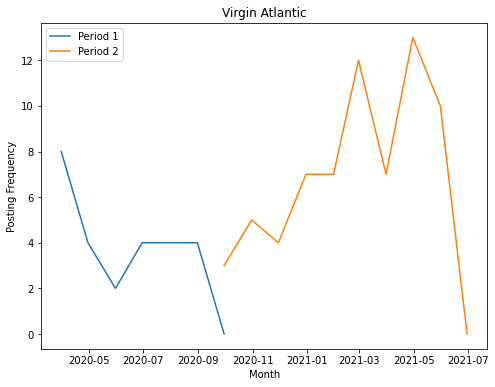

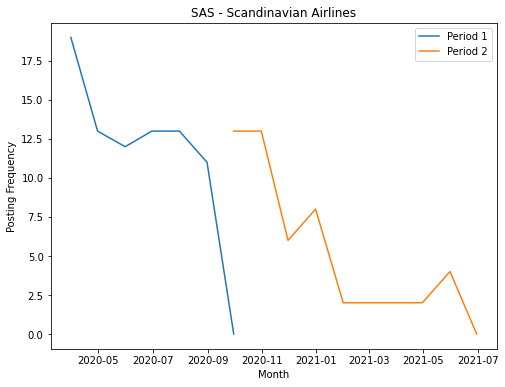

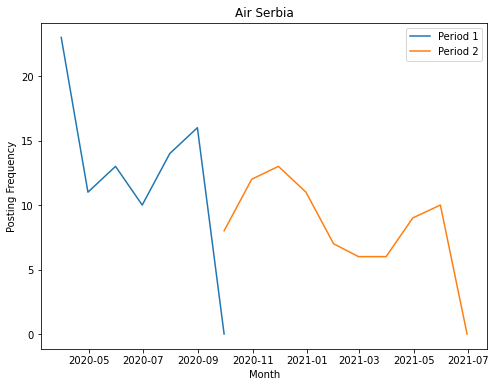

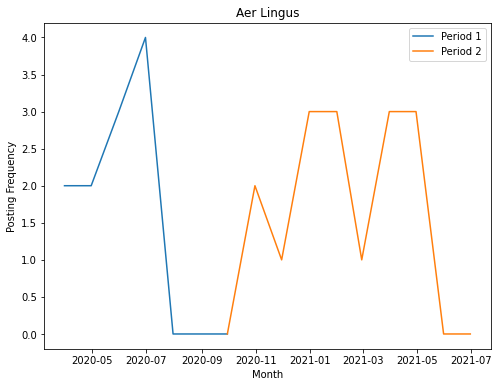

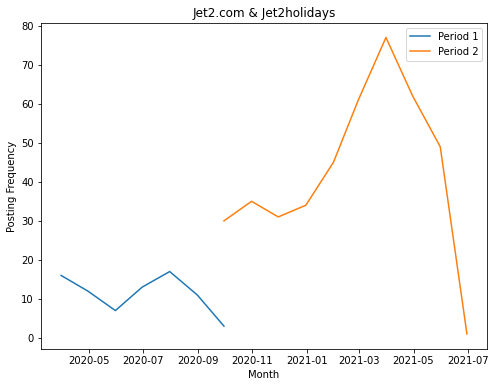

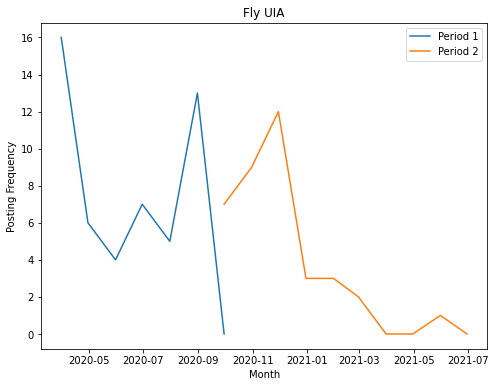

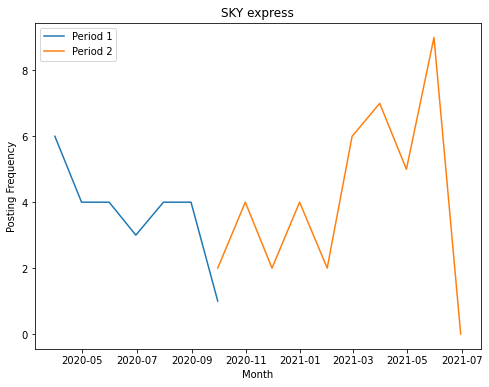

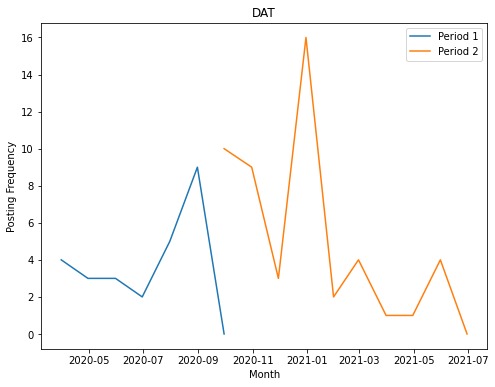

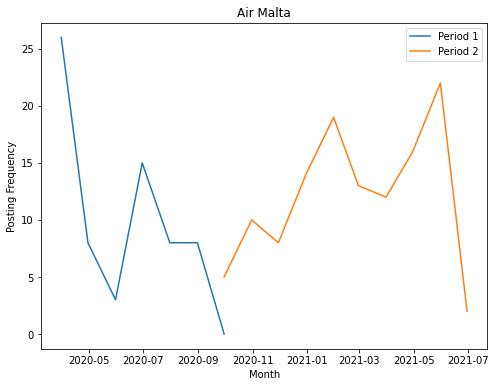

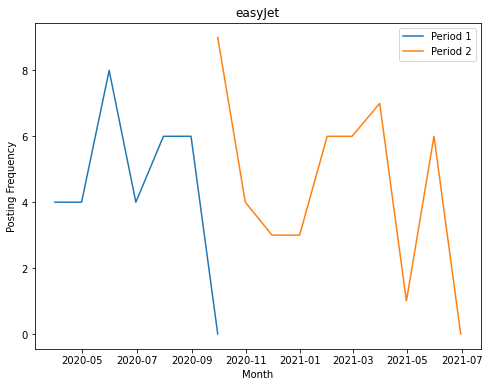

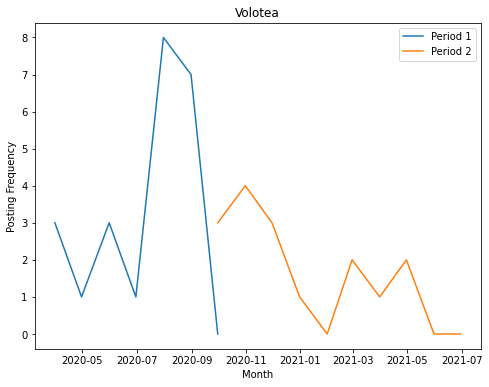

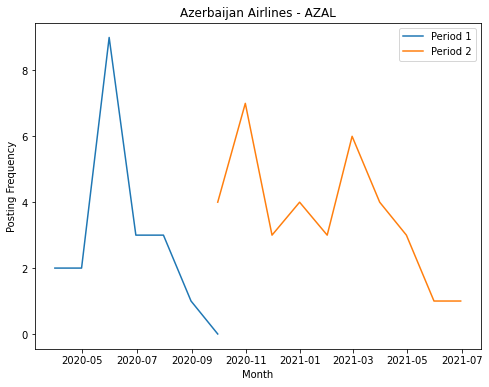

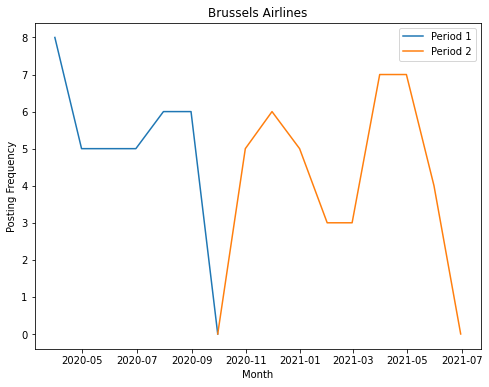

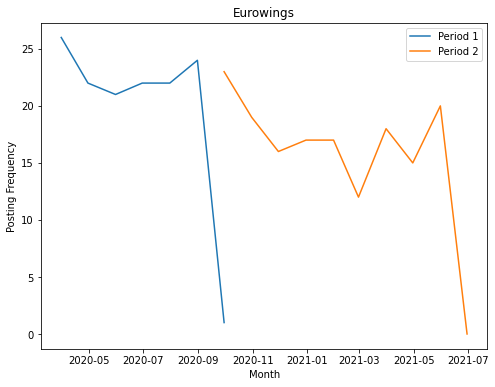

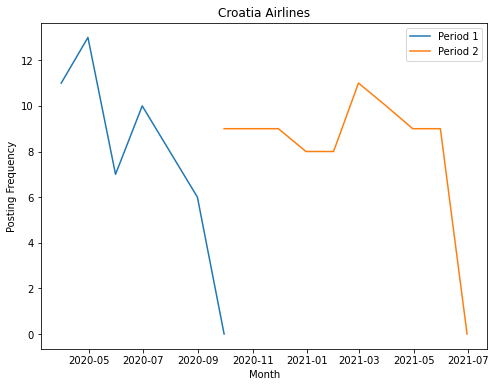

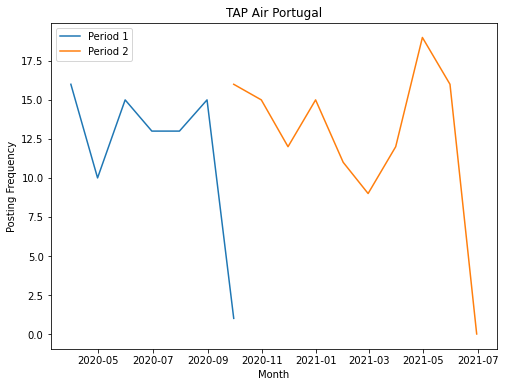

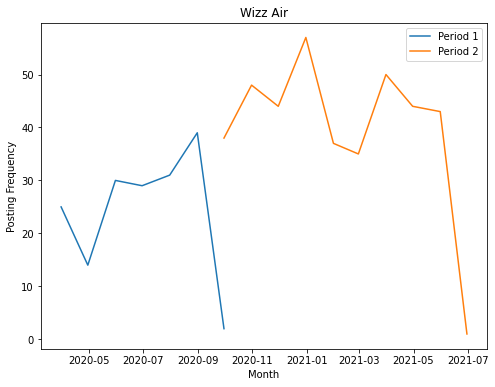

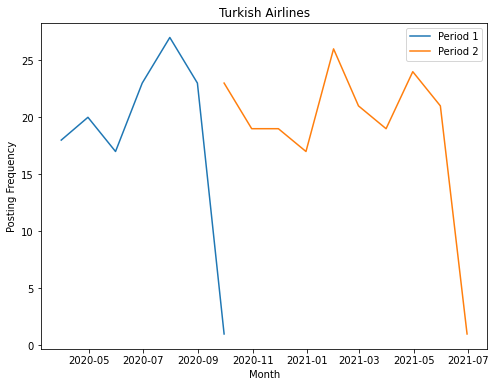

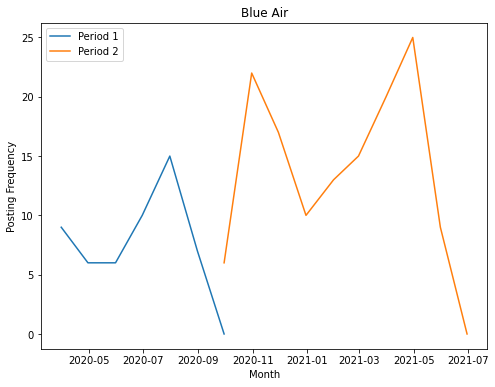

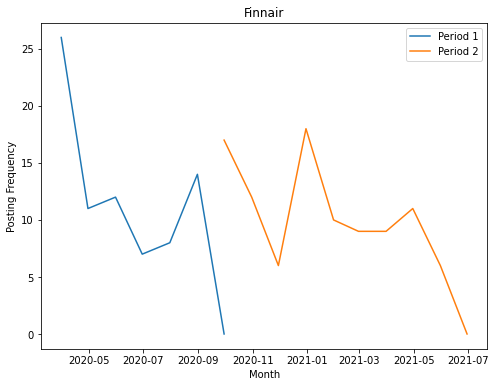

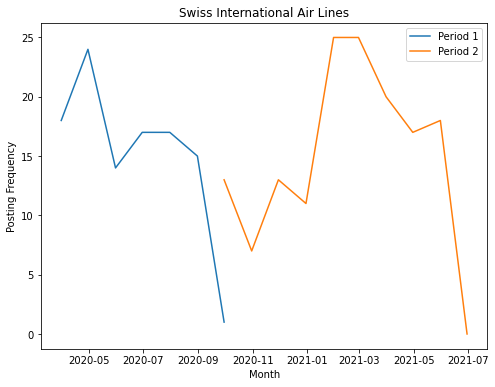

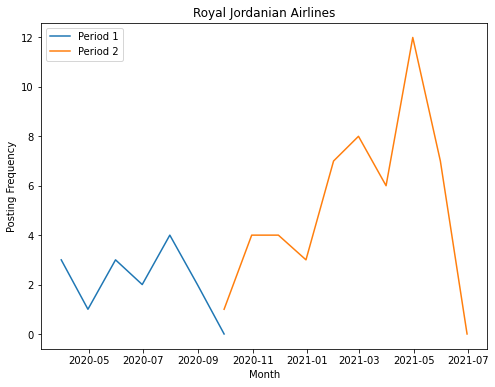

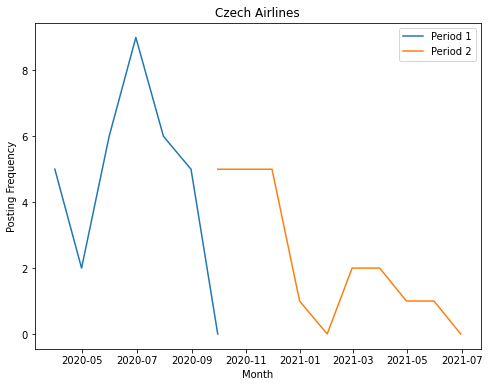

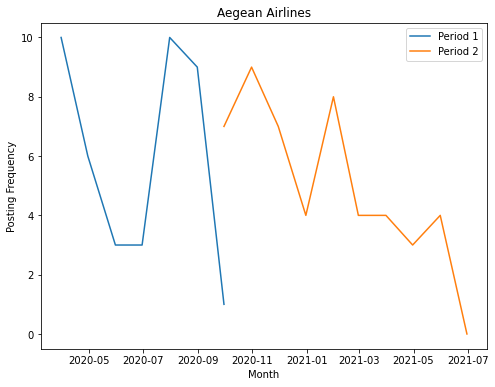

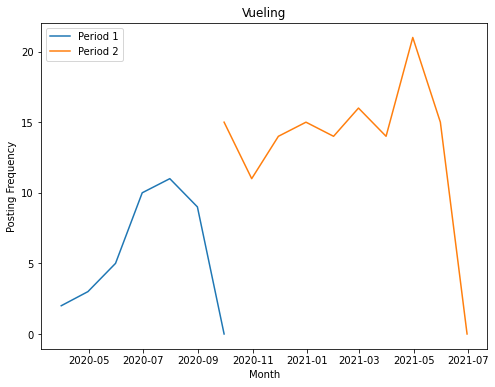

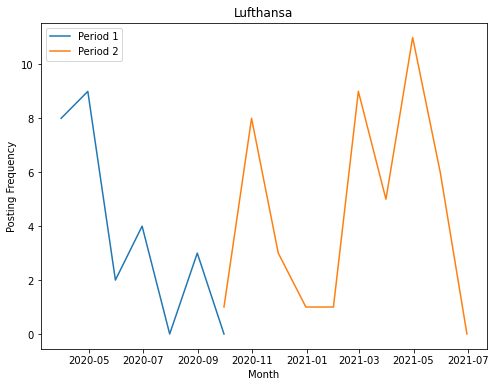

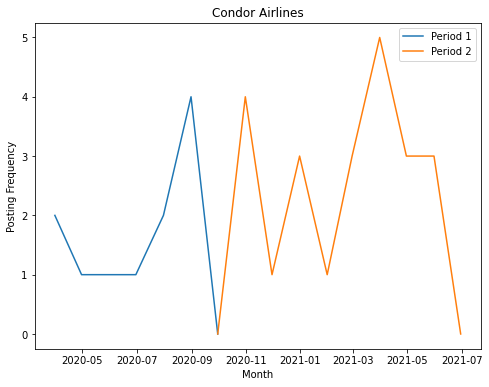

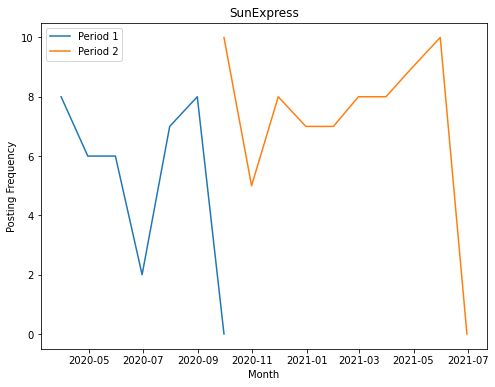

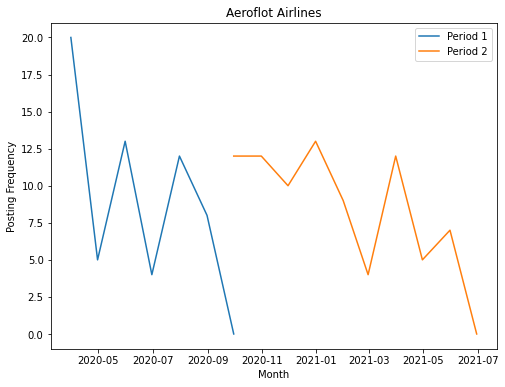

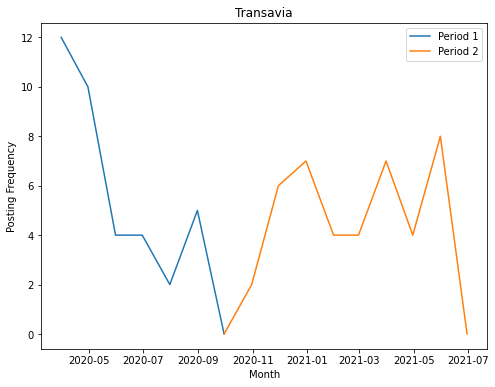

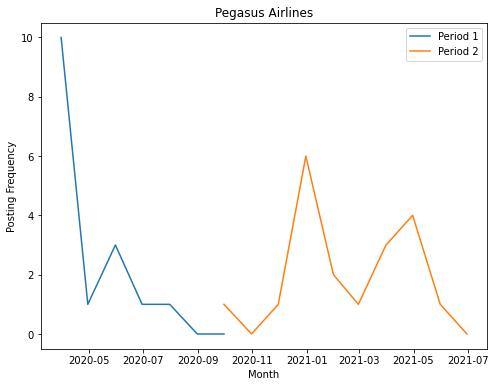

In [70]:
for airline in airlines:
    if airline not in posting_freq_period_1.index or airline not in posting_freq_period_2.index:
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(posting_freq_period_1.loc[airline], label='Period 1')
    ax.plot(posting_freq_period_2.loc[airline], label='Period 2')
    ax.set_title(airline)
    ax.set_xlabel('Month')
    ax.set_ylabel('Posting Frequency')
    ax.legend()
    plt.show()

# Evaluations

In [71]:
def perc_difference(value_1, value_2):
    return (((value_1-value_2)/(value_1))*100)

In [72]:
print('Popularity evaluations of overall significantlly different')
print('')
popularity_period_1, scaled_pop_1 = brand_popularity(df,'2020-03-01','2020-09-01',significant_changes_ranksum)
popularity_period_2, scaled_pop_2 = brand_popularity(df,'2020-09-01','2021-06-01',significant_changes_ranksum)

popularity_period_1 = popularity_period_1.dropna(subset=['Popularity Weighted Score'])

popularity_period_2 = popularity_period_2.dropna(subset=['Popularity Weighted Score'])

perc_diff_overal_psig = perc_difference(scaled_pop_1,scaled_pop_2)

Popularity evaluations of overall significantlly different

Average Popularity weighted score:  927452.5209473685
Average Popularity weighted score (scaled):  0.4219864597843499
Average Popularity weighted score:  906200.125916099
Average Popularity weighted score (scaled):  0.4032110981288452


In [73]:
print('Popularity evaluations of overall non-significantlly different')
print('')
popularity_nsignificant_period_1,scaled_npop_1 = brand_popularity(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum)
popularity_nsignificant_period_2,scaled_npop_2 = brand_popularity(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum)

popularity_nsignificant_period_1 = popularity_nsignificant_period_1.dropna(subset=['Popularity Weighted Score'])
popularity_nsignificant_period_2 = popularity_nsignificant_period_2.dropna(subset=['Popularity Weighted Score'])
perc_diff_overal_pnsig = perc_difference(scaled_npop_1,scaled_npop_2)

Popularity evaluations of overall non-significantlly different

Average Popularity weighted score:  779501.2669046624
Average Popularity weighted score (scaled):  0.10924612303877577
Average Popularity weighted score:  780812.5327045551
Average Popularity weighted score (scaled):  0.10928754826607762


In [74]:
print('Popularity evaluations of big airlines significantlly different')
print('')
popularity_period_1,scaled_bpop_1 = brand_popularity(df,'2020-03-01','2020-09-01',significant_changes_ranksum_big)
popularity_period_2,scaled_bpop_2 = brand_popularity(df,'2020-09-01','2021-06-01',significant_changes_ranksum_big)

popularity_period_1 = popularity_period_1.dropna(subset=['Popularity Weighted Score'])

popularity_period_2 = popularity_period_2.dropna(subset=['Popularity Weighted Score'])
perc_diff_big_psig = perc_difference(scaled_bpop_1,scaled_bpop_2)

Popularity evaluations of big airlines significantlly different

Average Popularity weighted score:  2174711.371355769
Average Popularity weighted score (scaled):  0.9894832694117693
Average Popularity weighted score:  2185523.4965678775
Average Popularity weighted score (scaled):  0.9724422937446339


In [75]:
print('Popularity evaluations of big airlines non-significantlly different')
print('')
popularity_period_1,scaled_bnpop_1 = brand_popularity(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum_big)
popularity_period_2,scaled_bnpop_2 = brand_popularity(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum_big)

popularity_period_1 = popularity_period_1.dropna(subset=['Popularity Weighted Score'])

popularity_period_2 = popularity_period_2.dropna(subset=['Popularity Weighted Score'])
perc_diff_big_pnsig = perc_difference(scaled_bnpop_1,scaled_bnpop_2)

Popularity evaluations of big airlines non-significantlly different

Average Popularity weighted score:  705644.0792276264
Average Popularity weighted score (scaled):  0.09889513099446104
Average Popularity weighted score:  661134.9465805546
Average Popularity weighted score (scaled):  0.09253670293244705


In [76]:
print('Popularity evaluations of small airlines significantlly different')
print('')
popularity_period_1,scaled_spop_1 = brand_popularity(df,'2020-03-01','2020-09-01',significant_changes_ranksum_small)
popularity_period_2,scaled_spop_2 = brand_popularity(df,'2020-09-01','2021-06-01',significant_changes_ranksum_small)

popularity_period_1 = popularity_period_1.dropna(subset=['Popularity Weighted Score'])

popularity_period_2 = popularity_period_2.dropna(subset=['Popularity Weighted Score'])
perc_diff_small_psig = perc_difference(scaled_spop_1,scaled_spop_2)

Popularity evaluations of small airlines significantlly different

Average Popularity weighted score:  403351.83229090914
Average Popularity weighted score (scaled):  0.4811391165499888
Average Popularity weighted score:  389132.02479486226
Average Popularity weighted score (scaled):  0.4574951009520971


In [77]:
print('Popularity evaluations of small airlines non-significantlly different')
print('')
popularity_period_1,scaled_snpop_1 = brand_popularity(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum_small)
popularity_period_2,scaled_snpop_2 = brand_popularity(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum_small)

popularity_period_1 = popularity_period_1.dropna(subset=['Popularity Weighted Score'])

popularity_period_2 = popularity_period_2.dropna(subset=['Popularity Weighted Score'])
perc_diff_small_pnsig = perc_difference(scaled_snpop_1,scaled_snpop_2)

Popularity evaluations of small airlines non-significantlly different

Average Popularity weighted score:  909404.445832966
Average Popularity weighted score (scaled):  0.12745189032980606
Average Popularity weighted score:  992897.9351585151
Average Popularity weighted score (scaled):  0.13860485864096403


In [78]:
eng_1,avg_eng_1 = brand_engagement(df,'2020-03-01','2020-09-01',significant_changes_ranksum)
eng_2,avg_eng_2 = brand_engagement(df,'2020-09-01','2021-06-01',significant_changes_ranksum)

eng_1 = eng_1.dropna(subset=['Engagement Rate'])
eng_2 = eng_2.dropna(subset=['Engagement Rate'])
perc_diff_overal_sig = perc_difference(avg_eng_1,avg_eng_2)

Average engagement rate:  0.007810234287175613
Average engagement rate:  0.0029263615991465377


In [79]:
eng_nsignificant_1,avg_neng_1 = brand_engagement(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum)
eng_nsignificant_2,avg_neng_2 = brand_engagement(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum)

eng_nsignificant_1 = eng_nsignificant_1.dropna(subset=['Engagement Rate'])
eng_nsignificant_2 = eng_nsignificant_2.dropna(subset=['Engagement Rate'])
perc_diff_overal_nonsig = perc_difference(avg_neng_1,avg_neng_2)

Average engagement rate:  0.033072505519627045
Average engagement rate:  0.020113904611690755


In [80]:
eng_1,avg_beng_1 = brand_engagement(df,'2020-03-01','2020-09-01',significant_changes_ranksum_big)
eng_2,avg_beng_2 = brand_engagement(df,'2020-09-01','2021-06-01',significant_changes_ranksum_big)

eng_1 = eng_1.dropna(subset=['Engagement Rate'])
eng_2 = eng_2.dropna(subset=['Engagement Rate'])
perc_diff_big_sig = perc_difference(avg_beng_1,avg_beng_2)

Average engagement rate:  0.13029026614412925
Average engagement rate:  0.009737360105573748


In [81]:
eng_nsignificant_1,avg_bneng_1 = brand_engagement(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum_big)
eng_nsignificant_2,avg_bneng_2 = brand_engagement(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum_big)

eng_nsignificant_1 = eng_nsignificant_1.dropna(subset=['Engagement Rate'])
eng_nsignificant_2 = eng_nsignificant_2.dropna(subset=['Engagement Rate'])
perc_diff_big_nonsig = perc_difference(avg_bneng_1,avg_bneng_2)

Average engagement rate:  0.007208650492505793
Average engagement rate:  0.00355373330263722


In [82]:
eng_1,avg_seng_1 = brand_engagement(df,'2020-03-01','2020-09-01',significant_changes_ranksum_small)
eng_2,avg_seng_2 = brand_engagement(df,'2020-09-01','2021-06-01',significant_changes_ranksum_small)

eng_1 = eng_1.dropna(subset=['Engagement Rate'])
eng_2 = eng_2.dropna(subset=['Engagement Rate'])
perc_diff_small_sig = perc_difference(avg_seng_1,avg_seng_2)

Average engagement rate:  0.010718103419504467
Average engagement rate:  0.003946375820999096


In [83]:
eng_nsignificant_1,avg_sneng_1 = brand_engagement(df,'2020-03-01','2020-09-01',non_significant_changes_ranksum_small)
eng_nsignificant_2,avg_sneng_2 = brand_engagement(df,'2020-09-01','2021-06-01',non_significant_changes_ranksum_small)

eng_nsignificant_1 = eng_nsignificant_1.dropna(subset=['Engagement Rate'])
eng_nsignificant_2 = eng_nsignificant_2.dropna(subset=['Engagement Rate'])
perc_diff_small_nonsig = perc_difference(avg_sneng_1,avg_sneng_2)

Average engagement rate:  0.030439438574570786
Average engagement rate:  0.017438103805739923


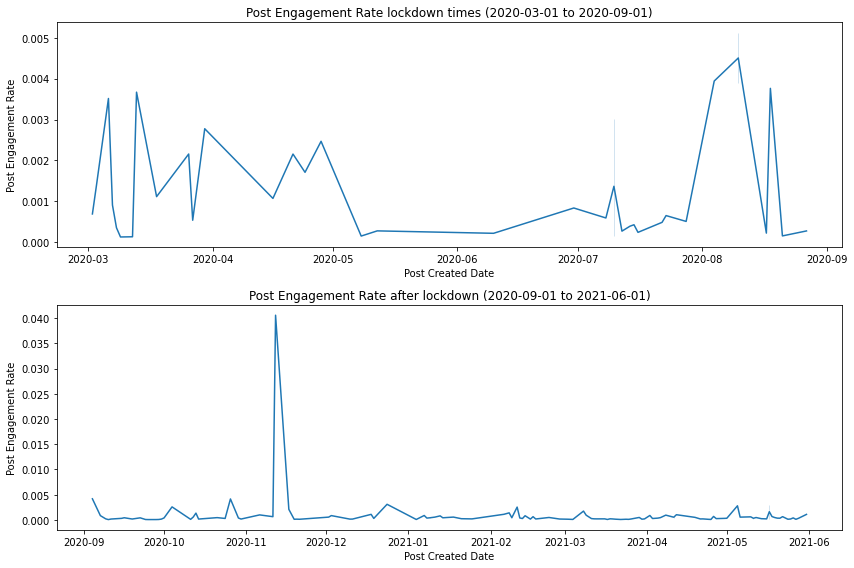

In [84]:
df = post_engagement(df)
df = post_popularity(df)

df_airline = df[df['Page Name'] == 'British Airways']

df_period_1 = df_airline[(df_airline['Post Created Date'] >= '2020-03-01') & (df_airline['Post Created Date'] <= '2020-09-01')]
df_period_2 = df_airline[(df_airline['Post Created Date'] >= '2020-09-01') & (df_airline['Post Created Date'] <= '2021-06-01')]


fig, axes = plt.subplots(2, 1, figsize=(12, 8))

sns.lineplot(data=df_period_1, x='Post Created Date', y='Post Engagement Rate', ax=axes[0]).set_title('Post Engagement Rate lockdown times (2020-03-01 to 2020-09-01)')
sns.lineplot(data=df_period_2, x='Post Created Date', y='Post Engagement Rate', ax=axes[1]).set_title('Post Engagement Rate after lockdown (2020-09-01 to 2021-06-01)')

plt.tight_layout()
plt.show()


In [85]:
df['Post Engagement Rate'].describe()

count    16576.000000
mean         0.003229
std          0.014697
min          0.000000
25%          0.000174
50%          0.000578
75%          0.002467
max          1.000000
Name: Post Engagement Rate, dtype: float64

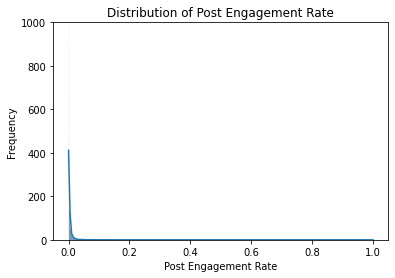

In [86]:
sns.histplot(data=df, x = 'Post Engagement Rate', kde=True)
plt.title('Distribution of Post Engagement Rate')
plt.xlabel('Post Engagement Rate')
plt.ylabel('Frequency')
plt.ylim([0, 1000])
plt.show()

In [87]:
df.shape

(16576, 31)

In [88]:
filter_df = df[df['Post Engagement Rate'].between(0,0.01)]
scaler = MinMaxScaler()
filter_df['Post Engagement Rate'] = scaler.fit_transform(filter_df['Post Engagement Rate'].values.reshape(-1, 1))

display(filter_df.shape)
display(filter_df['Post Engagement Rate'].describe())

<ipython-input-88-2b17dc4ff97a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Post Engagement Rate'] = scaler.fit_transform(filter_df['Post Engagement Rate'].values.reshape(-1, 1))


(15352, 31)

count    15352.000000
mean         0.142569
std          0.205583
min          0.000000
25%          0.015903
50%          0.048055
75%          0.175678
max          1.000000
Name: Post Engagement Rate, dtype: float64

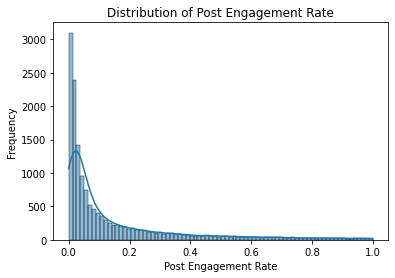

In [89]:
sns.histplot(data=filter_df, x = 'Post Engagement Rate', kde=True)
plt.title('Distribution of Post Engagement Rate')
plt.xlabel('Post Engagement Rate')
plt.ylabel('Frequency')
# plt.xlim([-1, 1])
# plt.ylim([0, 1000])
plt.show()

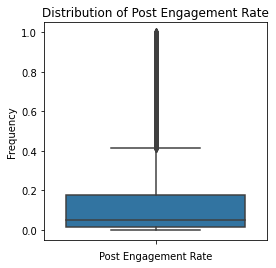

In [90]:
plt.figure(figsize=(4,4))
sns.boxplot(data=filter_df, y='Post Engagement Rate')
plt.title('Distribution of Post Engagement Rate')
plt.xlabel('Post Engagement Rate')
plt.ylabel('Frequency')
plt.show()

In [91]:
df = filter_df
df.shape

(15352, 31)

In [92]:
start_date = '2020-09-01'
end_date = '2021-06-01'

df_airline = df[(df['Page Name'] == 'British Airways') & (df['Post Created Date'] >= start_date) & (df['Post Created Date'] <= end_date)]

Q1 = df_airline['Post Engagement Rate'].quantile(0.25)
Q3 = df_airline['Post Engagement Rate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_airline[(df_airline['Post Engagement Rate'] < (Q1 - 1.5 * IQR)) | (df_airline['Post Engagement Rate'] > (Q3 + 1.5 * IQR))]

print(len(outliers))
print(len(df[(df['Page Name'] == 'British Airways') & (df['Post Created Date'] >= start_date) & (df['Post Created Date'] <= end_date)]))

11
125


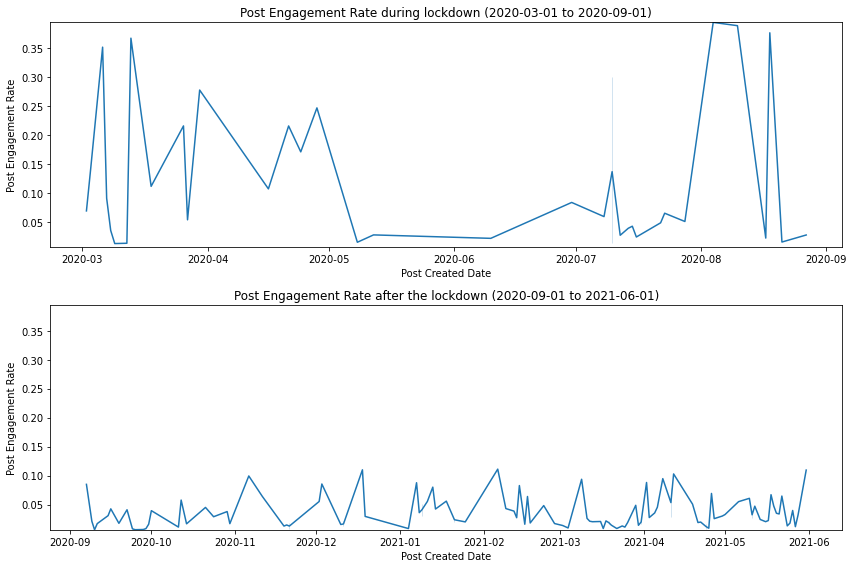

In [93]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_out

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

df_airline_period_1 = df[(df['Page Name'] == 'British Airways') & (df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
df_airline_period_2 = df[(df['Page Name'] == 'British Airways') & (df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]

df_airline_period_1_no_outliers = remove_outliers(df_airline_period_1, 'Post Engagement Rate')
df_airline_period_2_no_outliers = remove_outliers(df_airline_period_2, 'Post Engagement Rate')

engagement_min = min(df_airline_period_1_no_outliers['Post Engagement Rate'].min(), df_airline_period_2_no_outliers['Post Engagement Rate'].min())
engagement_max = max(df_airline_period_1_no_outliers['Post Engagement Rate'].max(), df_airline_period_2_no_outliers['Post Engagement Rate'].max())

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

sns.lineplot(data=df_airline_period_1_no_outliers, x='Post Created Date', y='Post Engagement Rate', ax=axes[0])
axes[0].set_title('Post Engagement Rate during lockdown (2020-03-01 to 2020-09-01)')
axes[0].set_ylim([engagement_min, engagement_max])  # Set y-axis limits for plot 1

sns.lineplot(data=df_airline_period_2_no_outliers, x='Post Created Date', y='Post Engagement Rate', ax=axes[1])
axes[1].set_title('Post Engagement Rate after the lockdown (2020-09-01 to 2021-06-01)')
axes[1].set_ylim([engagement_min, engagement_max])  # Set y-axis limits for plot 2

plt.tight_layout()
plt.show()



In [94]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_out

airlines = df['Page Name'].unique()
avg_engagement = pd.DataFrame(index=airlines, columns=['Average Engagement 1', 'Average Engagement 2'])

start_date_1 = '2020-03-01'
end_date_1 = '2020-09-01'
start_date_2 = '2020-09-01'
end_date_2 = '2021-06-01'

for airline in airlines:
    df_airline_period_1 = df[(df['Page Name'] == airline) & (df['Post Created Date'] >= start_date_1) & (df['Post Created Date'] <= end_date_1)]
    df_airline_period_2 = df[(df['Page Name'] == airline) & (df['Post Created Date'] >= start_date_2) & (df['Post Created Date'] <= end_date_2)]

    df_airline_period_1_no_outliers = remove_outliers(df_airline_period_1, 'Post Engagement Rate')
    df_airline_period_2_no_outliers = remove_outliers(df_airline_period_2, 'Post Engagement Rate')

    avg_engagement.loc[airline, 'Average Engagement 1'] = df_airline_period_1_no_outliers['Post Engagement Rate'].mean()
    avg_engagement.loc[airline, 'Average Engagement 2'] = df_airline_period_2_no_outliers['Post Engagement Rate'].mean()

print(avg_engagement['Average Engagement 1'].mean(),'      ', avg_engagement['Average Engagement 2'].mean())


0.2295259528691572        0.18718344299090428


Category  Percentage Change
0             Overall (Significant change)          62.531705
1         Overall (Non-significant change)          39.182399
2        Big airlines (Significant change)          92.526410
3    Big airlines (Non-significant change)          50.701823
4      Small airlines (Significant change)          63.180279
5  Small airlines (Non-significant change)          42.712137

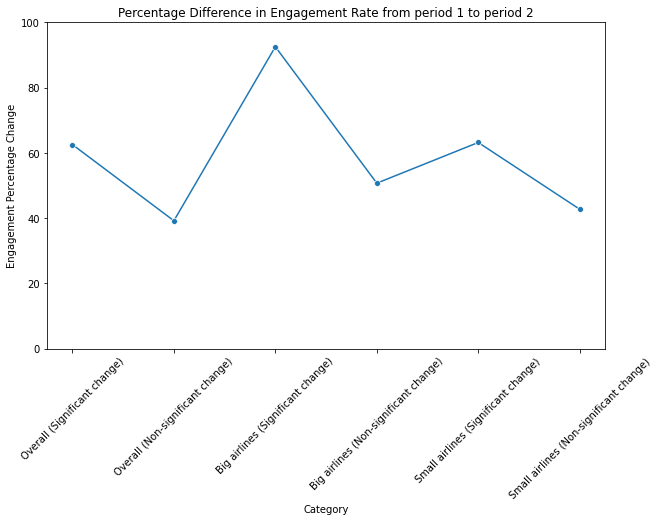

In [95]:
X_axis = [perc_diff_overal_sig, perc_diff_overal_nonsig, perc_diff_big_sig, perc_diff_big_nonsig, perc_diff_small_sig, perc_diff_small_nonsig]

alaki = pd.DataFrame({
    'Category': ['Overall (Significant change)', 'Overall (Non-significant change)',
                 'Big airlines (Significant change)', 'Big airlines (Non-significant change)',
                 'Small airlines (Significant change)', 'Small airlines (Non-significant change)'],
    'Percentage Change': [perc_diff_overal_sig, perc_diff_overal_nonsig, perc_diff_big_sig,
                          perc_diff_big_nonsig, perc_diff_small_sig, perc_diff_small_nonsig]
})

display(alaki)

plt.figure(figsize=(10,6))
sns.lineplot(data=alaki, x='Category', y='Percentage Change', sort=False, marker='o')
plt.xticks(rotation=45)
plt.title('Percentage Difference in Engagement Rate from period 1 to period 2')
plt.ylabel('Engagement Percentage Change')
plt.ylim(0, 100)
plt.show()

Category  Percentage Change
0             Overall (Significant change)           4.449281
1         Overall (Non-significant change)          -0.037919
2        Big airlines (Significant change)           1.722210
3    Big airlines (Non-significant change)           6.429465
4      Small airlines (Significant change)           4.914174
5  Small airlines (Non-significant change)          -8.750728

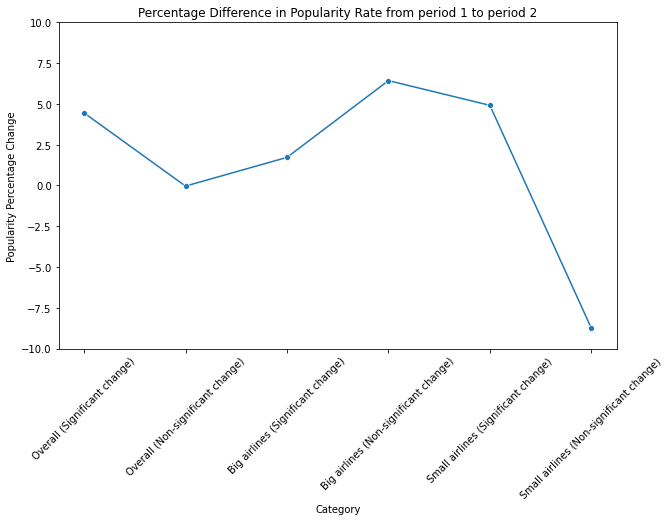

In [96]:
X_axis = [perc_diff_overal_psig, perc_diff_overal_pnsig, perc_diff_big_psig, perc_diff_big_pnsig, perc_diff_small_psig, perc_diff_small_pnsig]

alaki_2 = pd.DataFrame({
    'Category': ['Overall (Significant change)', 'Overall (Non-significant change)',
                 'Big airlines (Significant change)', 'Big airlines (Non-significant change)',
                 'Small airlines (Significant change)', 'Small airlines (Non-significant change)'],
    'Percentage Change': [perc_diff_overal_psig, perc_diff_overal_pnsig, perc_diff_big_psig,
                          perc_diff_big_pnsig, perc_diff_small_psig, perc_diff_small_pnsig]
})

display(alaki_2)

plt.figure(figsize=(10,6))
sns.lineplot(data=alaki_2, x='Category', y='Percentage Change', sort=False, marker='o')
plt.xticks(rotation=45)
plt.title('Percentage Difference in Popularity Rate from period 1 to period 2')
plt.ylabel('Popularity Percentage Change')
plt.ylim(-10, 10)
plt.show()

# Text Processing

### Preprocessing text

In [97]:
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [98]:
!{sys.executable} -m pip install emoji

In [99]:
!{sys.executable} -m pip install contractions

In [100]:
display(df.shape)
display(df.columns)

(15352, 31)

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score'],
      dtype='object')

In [101]:
display((df['Message'].str.len() == 0).any())
display((df['Message'].str.len()==0).sum())

True

51

In [102]:
df['Message'] = df['Message'].astype(str)
df = df[df['Message'].str.len() > 0]

display((df['Message'].str.len()==0).any())
display(len(df['Message']))
display(df['Message'].isna().any())

<ipython-input-102-3ad8b2cca0b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].astype(str)


False

15301

False

In [103]:
!{sys.executable} -m pip install --upgrade markupsafe

In [104]:
!{sys.executable} -m pip install --upgrade jinja2

In [105]:
import emoji
import contractions
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string


nlp = spacy.load('en_core_web_sm')

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_urls(text):
    url_pattern = re.compile(r'(http[s]?://\S+)|(\w+\.[A-Za-z]{2,})')
    return url_pattern.sub(r'', text)

def convert_emojis(text):
    clean = emoji.demojize(text).replace(":", " ")
    return clean

def expand_contractions(text):
    
    try:
        return contractions.fix(text)
    except Exception as e:
        print(f"Exception: {e} for text: {text}")
        return text

def preprocess(text):
    
    punct = string.punctuation
    if text.strip() == "":
        return ""
    
    
    text = re.sub("\'s", " ", text)
    text = re.sub(" whats ", "what is", text)
    text = re.sub("\'ve", " have", text)
    text = re.sub("can't", " cannot ", text)
    text = re.sub("n't", " not", text)
    text = re.sub("i'm", "i am", text)
    text = re.sub("\'re", " are", text)
    text = re.sub("\'d", " would", text)
    text = re.sub("\'ll", " will", text)
    
    text = expand_contractions(text)
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = convert_emojis(text)

    tokens = nlp(text)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in STOP_WORDS and word not in punct]
    
    return " ".join(tokens)

In [106]:
df['processed_text'] = df['Message'].apply(preprocess)

<ipython-input-106-4382c6be210c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['Message'].apply(preprocess)


In [107]:
display((df['processed_text'].str.len()==0).any())
display(len(df['processed_text']))
display(df['processed_text'].isna().any())
display((df['processed_text'].str.len()==0).sum())

df = df[df['processed_text'].str.len() > 0]
display((df['processed_text'].str.len()==0).sum())


True

15301

False

2

0

In [108]:
!{sys.executable} -m pip install transformers

In [109]:
!{sys.executable} -m pip install torch

# Feature Extraction:

## Feature 1: Sentiment Analysis

### BERT pre-trained sentiment:

In [111]:
!{sys.executable} -m pip install Xformers

In [112]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_NAME = "distilbert-base-uncased" 

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def encode_text(text):
    max_length = 512  
    encoded_input = tokenizer(text[:max_length], truncation=True, padding=True, return_tensors='pt')
    return encoded_input

def get_sentiment(encoded_input):
    with torch.no_grad():
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        sentiment = np.argmax(scores)

    if sentiment == 0:
        return 'Negative'
    else:
        return 'Positive'
    


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

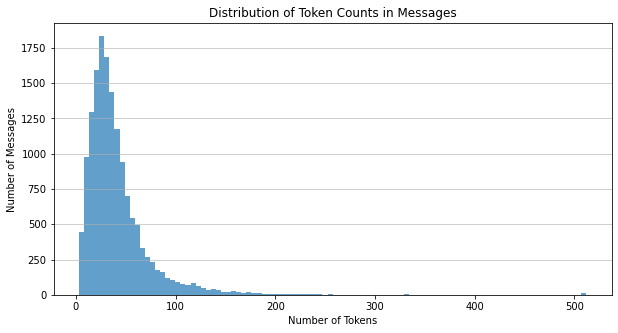

In [115]:
count = df['processed_text'].apply(lambda x: len(tokenizer.encode(x, truncation=True)))

plt.figure(figsize=(10, 5))
plt.hist(count, bins=100, alpha=0.7)
plt.title('Distribution of Token Counts in Messages')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Messages')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [116]:
df['Encoded Text'] = df['processed_text'].apply(encode_text)
df['Sentiment_Bert'] = df['Encoded Text'].apply(get_sentiment)

<ipython-input-116-e933d55edb1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encoded Text'] = df['processed_text'].apply(encode_text)
<ipython-input-116-e933d55edb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Bert'] = df['Encoded Text'].apply(get_sentiment)


In [117]:
display(df['Sentiment_Bert'].value_counts())

Negative    15299
Name: Sentiment_Bert, dtype: int64

In [118]:
df.to_csv('df.csv')

### NLTK VADER Lexicon Sentiment:

In [119]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['lexicon_sent'] = df['processed_text'].apply(lambda text: sid.polarity_scores(text))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohamadfayazi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-119-b7df0b5bff3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lexicon_sent'] = df['processed_text'].apply(lambda text: sid.polarity_scores(text))


In [120]:
def get_sent_label(scores):
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [121]:
df['lexicon_lab'] = df['lexicon_sent'].apply(get_sent_label)

<ipython-input-121-73fda68987d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lexicon_lab'] = df['lexicon_sent'].apply(get_sent_label)


In [122]:
df['lexicon_lab'].value_counts()

Positive    12473
Neutral      1983
Negative      843
Name: lexicon_lab, dtype: int64

In [123]:
unique_words = set(' '.join(df['processed_text']).split())
len(unique_words)

26719

### Sentiment and engagement correlation Analysis:

In [124]:
df.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score', 'processed_text', 'Encoded Text',
       'Sentiment_Bert', 'lexicon_sent', 'lexicon_lab'],
      dtype='object')

In [125]:
df['Total Interactions']

1025      4067.000000
0        26285.000000
610        416.000000
9466      3178.000000
15        4105.000000
             ...     
32924      625.938134
32923      625.938134
32936      625.938134
32935      625.938134
32949      131.757862
Name: Total Interactions, Length: 15299, dtype: float64

In [126]:
# df['Total Interactions'] = df['Total Interactions'].str.replace(',', '').astype(float)
df['Total Interactions'] = df.groupby('Page Name')['Total Interactions'].transform(lambda x: x.fillna(x.mean()))

# df = post_engagement(df)
# df = post_popularity(df)
display(df['Post Scaled Popularity Score'].isna().sum())
df = df.dropna(subset=['Post Scaled Popularity Score'])

<ipython-input-126-685e49e50e93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Interactions'] = df.groupby('Page Name')['Total Interactions'].transform(lambda x: x.fillna(x.mean()))


0

In [127]:
df['lexicon_sent']

1025     {'neg': 0.102, 'neu': 0.841, 'pos': 0.057, 'co...
0        {'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...
610      {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'comp...
9466     {'neg': 0.217, 'neu': 0.536, 'pos': 0.246, 'co...
15       {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...
                               ...                        
32924    {'neg': 0.061, 'neu': 0.523, 'pos': 0.416, 'co...
32923    {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...
32936    {'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'comp...
32935    {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...
32949    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
Name: lexicon_sent, Length: 15299, dtype: object

In [128]:
from scipy.stats import pearsonr

df['Compound Lex Score'] = df['lexicon_sent'].apply(lambda scores: scores['compound'])
corr, p_value = pearsonr(df['Post Engagement Rate'],df['Compound Lex Score'])

print("Pearson Correlation Coefficient: ", corr)
print("p-value: ", p_value)


Pearson Correlation Coefficient:  -0.04935573998848405
p-value:  1.0089242575659048e-09


In [129]:
from sklearn.linear_model import LinearRegression

X = df['Compound Lex Score'].values.reshape(-1, 1)
y = df['Post Engagement Rate'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  [0.15697186]
Coefficient:  [[-0.02618095]]


In [130]:
df.to_csv('df.csv')

## Feature 2: Posts length

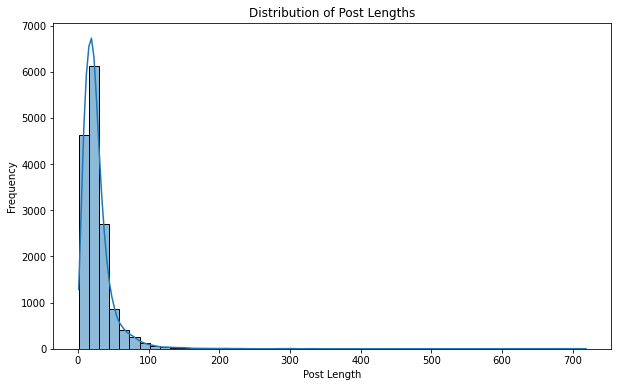

In [131]:
df['text_length'] = df['processed_text'].apply(lambda x: len(x.split()))
avg_length_total = df['text_length']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True)
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length')
plt.ylabel('Frequency')
plt.show()

In [132]:
df_bigger_airlines = df[df['Page Name'].isin(bigger_airlines.index)]

avg_likes = df_bigger_airlines.groupby('Page Name')['Likes'].mean()
avg_likes = avg_likes.sort_values(ascending=False)
std_likes = df_bigger_airlines.groupby('Page Name')['Likes'].std()
std_likes = std_likes.sort_values(ascending=False)

threshold = avg_likes + std_likes/5
popular_posts = df_bigger_airlines[df_bigger_airlines.apply(lambda row: row['Likes'] >= threshold[row['Page Name']], axis=1)]

display(popular_posts['Page Name'].nunique())
display(df_bigger_airlines['Page Name'].nunique())

display(popular_posts.shape)
display(df_bigger_airlines.shape)

11

11

(849, 38)

(4039, 38)

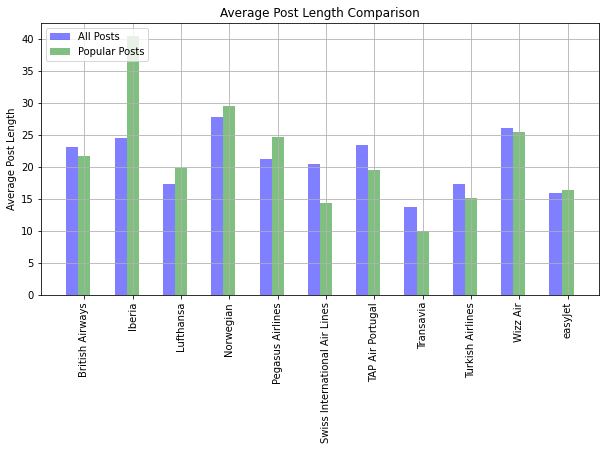

In [133]:
avg_length_bigger = df_bigger_airlines.groupby('Page Name')['processed_text'].apply(lambda x: np.mean(x.str.split().str.len()))
avg_length_bigger_popular = popular_posts.groupby('Page Name')['processed_text'].apply(lambda x: np.mean(x.str.split().str.len()))

avg_lengths = pd.DataFrame({
    'All Posts': avg_length_bigger,
    'Popular Posts': avg_length_bigger_popular
})


avg_length_bigger, avg_length_bigger_popular = avg_length_bigger.align(avg_length_bigger_popular, fill_value=0)

pos = list(range(len(avg_length_bigger))) 
width = 0.25 
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, avg_length_bigger, width, alpha=0.5, color='blue', label='avg_length_all') 
plt.bar([p + width for p in pos], avg_length_bigger_popular, width, alpha=0.5, color='green', label='avg_length_popular') 

ax.set_ylabel('Average Post Length')
ax.set_title('Average Post Length Comparison')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(avg_lengths.index, rotation=90)
plt.legend(['All Posts', 'Popular Posts'], loc='upper left')
plt.grid()
plt.show()


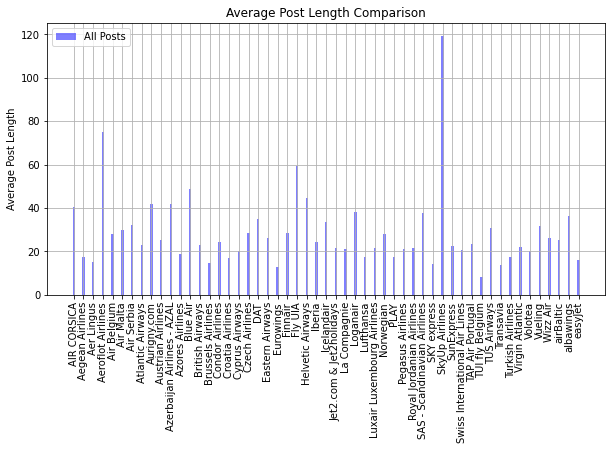

In [134]:
avg_length_rest = df.groupby('Page Name')['processed_text'].apply(lambda x: np.mean(x.str.split().str.len()))

pos = list(range(len(avg_length_rest))) 
width = 0.25 
fig, ax = plt.subplots(figsize=(10,5)) 
plt.bar([p + width for p in pos], avg_length_rest, width, alpha=0.5, color='blue', label='avg_length_all') 

ax.set_ylabel('Average Post Length')
ax.set_title('Average Post Length Comparison')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(avg_length_rest.index, rotation=90)
plt.legend(['All Posts', 'Popular Posts'], loc='upper left')
plt.grid()
plt.show()

## Feature 3: Timeseries analysis

In [135]:
df.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score', 'processed_text', 'Encoded Text',
       'Sentiment_Bert', 'lexicon_sent', 'lexicon_lab', 'Compound Lex Score',
       'text_length'],
      dtype='object')

In [136]:
bigger_airlines.head()

Page Name
Turkish Airlines    1.069826e+07
Lufthansa           3.943462e+06
Wizz Air            3.322747e+06
British Airways     3.301912e+06
Iberia              1.831813e+06
Name: Followers at Posting, dtype: float64

In [137]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_out

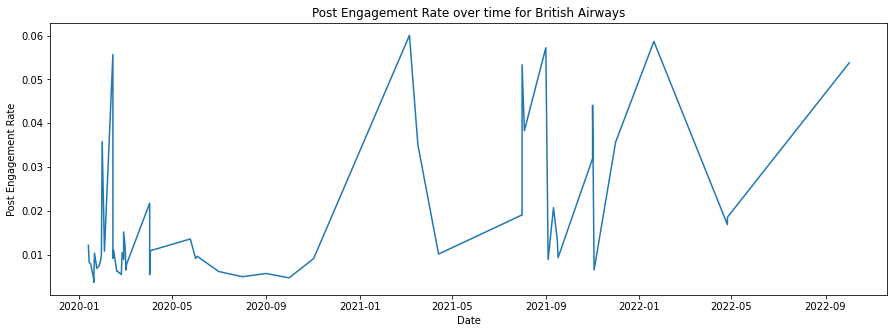

In [138]:
df = df.sort_values(by='Post Created Date')
df_airline_specific = df[df['Page Name'] == 'Iberia']
df_airline_specific = remove_outliers(df_airline_specific,'Post Engagement Rate')

plt.figure(figsize=(15, 5))
plt.plot(df_airline_specific['Post Created Date'], df_airline_specific['Post Engagement Rate'])
plt.title('Post Engagement Rate over time for British Airways')
plt.xlabel('Date')
plt.ylabel('Post Engagement Rate')
plt.show()

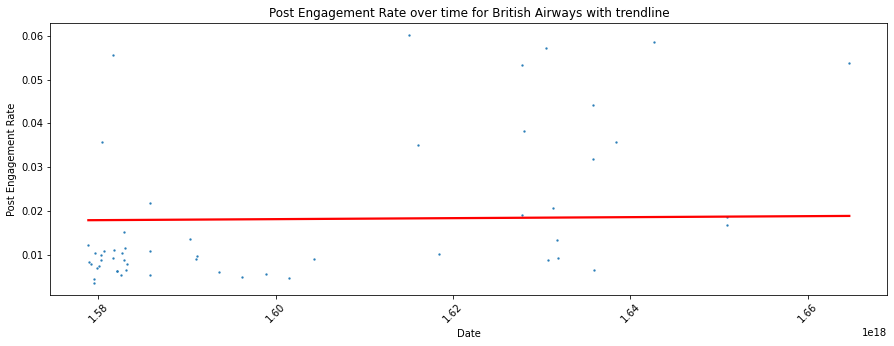

In [139]:
plt.figure(figsize=(15, 5))
sns.regplot(x=df_airline_specific['Post Created Date'].view(int), y='Post Engagement Rate', data=df_airline_specific, scatter_kws={'s':2}, line_kws={'color': 'red'}, ci=None)
plt.title('Post Engagement Rate over time for British Airways with trendline')
plt.xlabel('Date')
plt.ylabel('Post Engagement Rate')
plt.xticks(rotation=45)
plt.show()

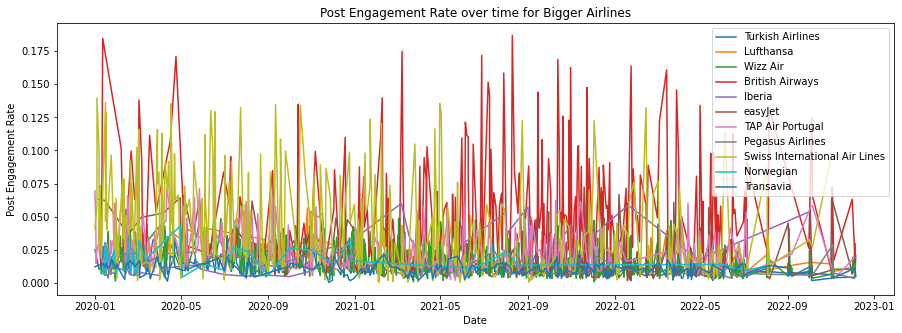

In [140]:
df = df.sort_values(by='Post Created Date')

df_bigger = df[df['Page Name'].isin(bigger_airlines.index)]

plt.figure(figsize=(15,5))

for airline in bigger_airlines.index:
    df_airline = df_bigger[df_bigger['Page Name'] == airline]
    df_airline = remove_outliers(df_airline,'Post Engagement Rate')
    plt.plot(df_airline['Post Created Date'], df_airline['Post Engagement Rate'], label=airline)

    # df_airline['Post Engagement Rate'] = df_airline['Post Engagement Rate'].rolling(window=7).mean()
    # plt.plot(df_airline['Post Created Date'], df_airline['Post Engagement Rate'], label=airline)

plt.title('Post Engagement Rate over time for Bigger Airlines')
plt.xlabel('Date')
plt.ylabel('Post Engagement Rate')
plt.legend()
plt.show()

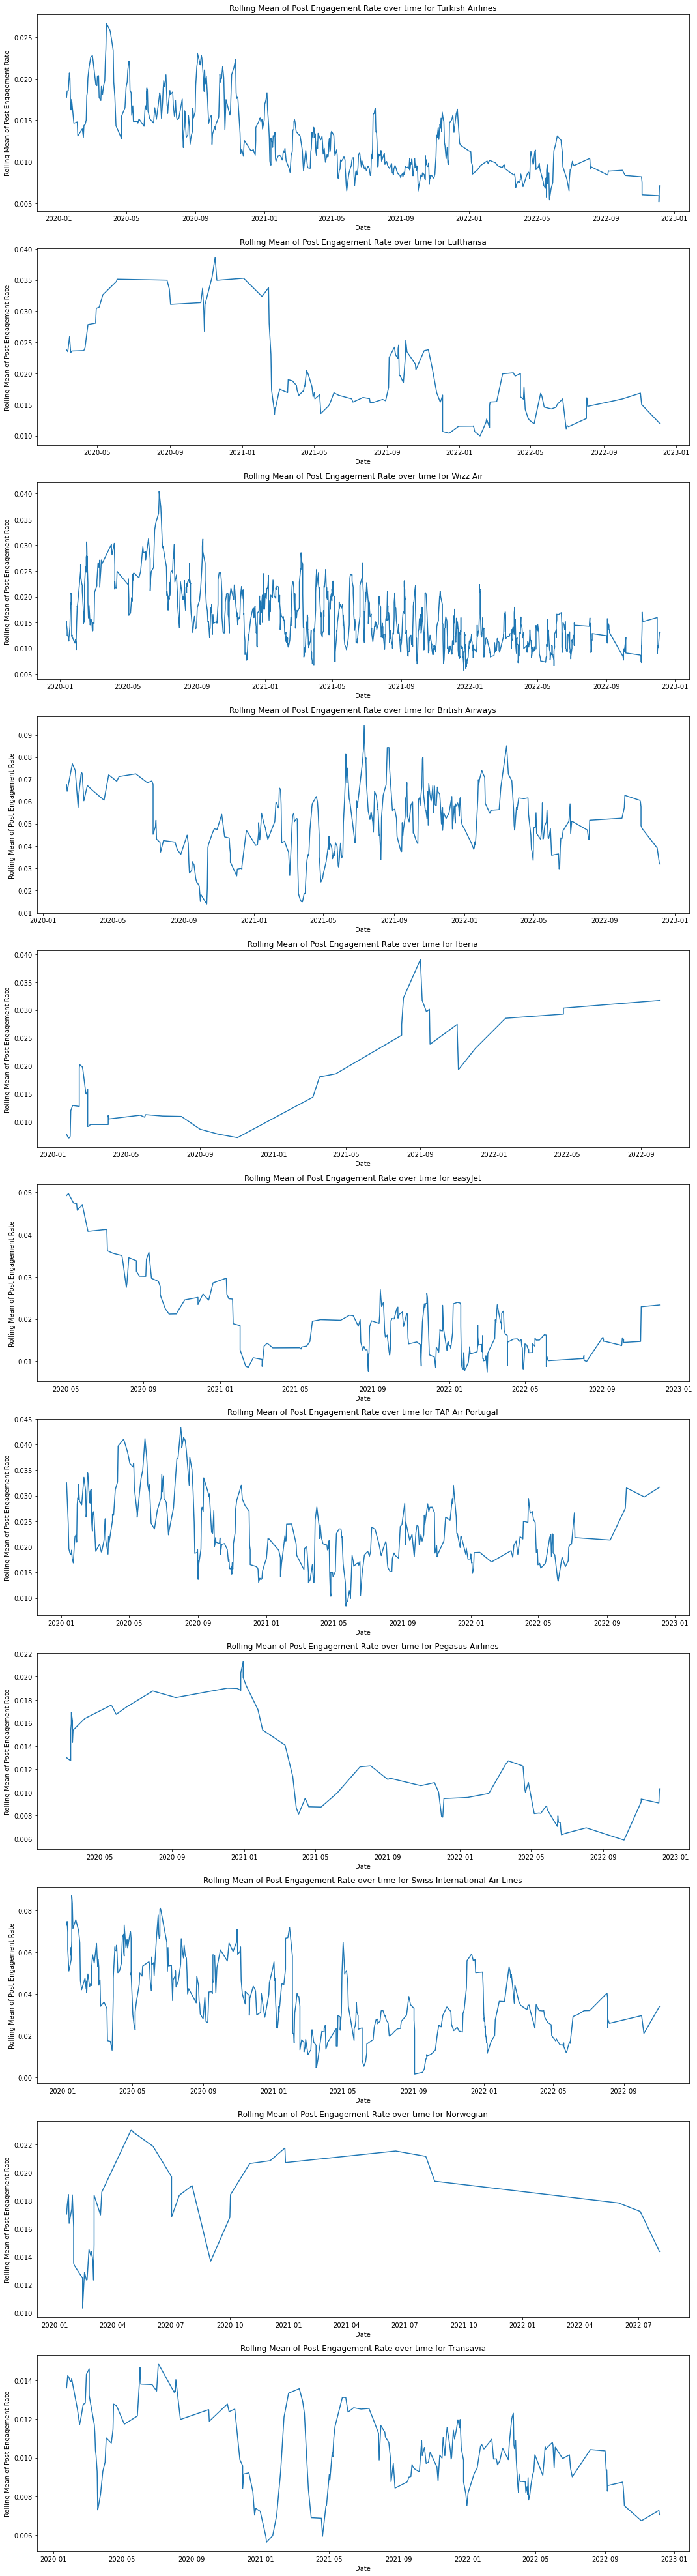

In [141]:
window_size = 7

fig, axes = plt.subplots(len(bigger_airlines.index), 1, figsize=(15, len(bigger_airlines.index)*5))

for i, airline in enumerate(bigger_airlines.index):
    df_airline = df_bigger[df_bigger['Page Name'] == airline]
    df_airline = remove_outliers(df_airline,'Post Engagement Rate')

    df_airline['Rolling Mean'] = df_airline['Post Engagement Rate'].rolling(window=window_size).mean()

    axes[i].plot(df_airline['Post Created Date'], df_airline['Rolling Mean'], label=airline)
    axes[i].set_title('Rolling Mean of Post Engagement Rate over time for ' + airline)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Rolling Mean of Post Engagement Rate')

plt.tight_layout()
plt.show()


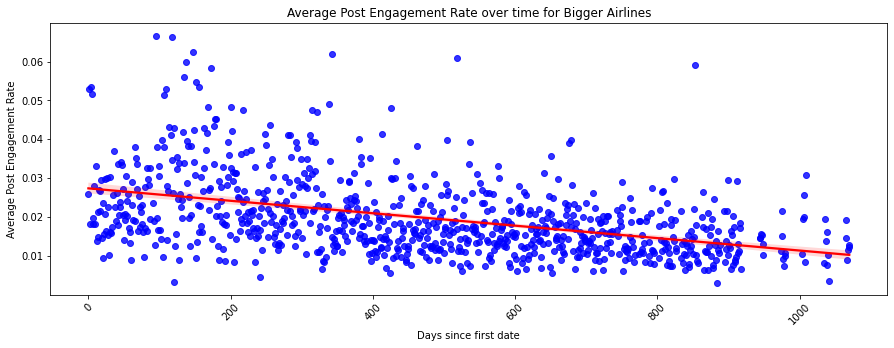

In [142]:
df_bigger_outliers_out = remove_outliers(df_bigger,'Post Engagement Rate')
df_avg_engagement = df_bigger_outliers_out.groupby('Post Created Date')['Post Engagement Rate'].mean().reset_index()

df_avg_engagement.reset_index(inplace=True)


df_avg_engagement['Post Created Date'] = (df_avg_engagement['Post Created Date'] - df_avg_engagement['Post Created Date'].min()) / np.timedelta64(1, 'D')

plt.figure(figsize=(15, 5))
sns.regplot(x='Post Created Date', y='Post Engagement Rate', data=df_avg_engagement, color='blue', line_kws={'color': 'red'})
plt.title('Average Post Engagement Rate over time for Bigger Airlines')
plt.xlabel('Days since first date')
plt.ylabel('Average Post Engagement Rate')
plt.xticks(rotation=45)
plt.show()

In [143]:
df['Post Created Time'] = pd.to_datetime(df['Post Created Time'], format='%H:%M:%S').dt.time
df['hour'] = df['Post Created Time'].apply(lambda x: x.hour)
df['month'] = df['Post Created Date'].dt.month

In [144]:
big = df[df['Page Name'].isin(bigger_airlines.index)]

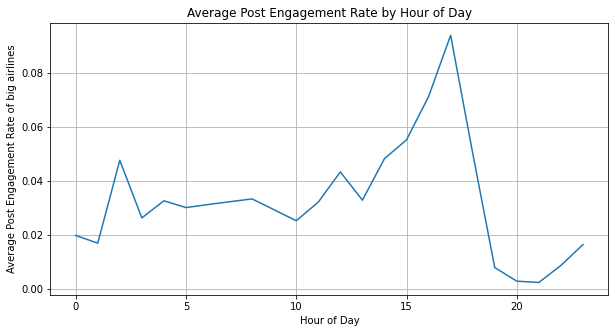

In [145]:
hourly_engagement = big.groupby('hour')['Post Engagement Rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_engagement)
plt.title('Average Post Engagement Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Post Engagement Rate of big airlines')
plt.grid(True)
plt.show()

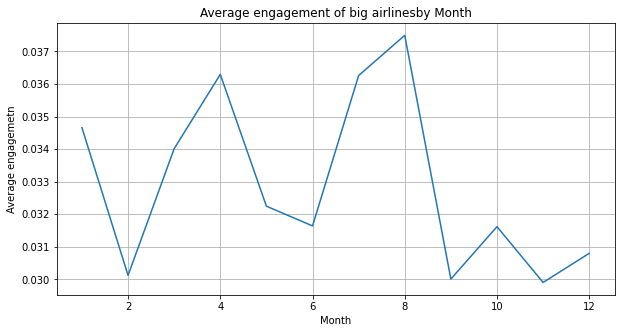

In [146]:
monthly_engagement = big.groupby('month')['Post Engagement Rate'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_engagement)
plt.title('Average engagement of big airlinesby Month')
plt.xlabel('Month')
plt.ylabel('Average engagemetn')
plt.grid(True)
plt.show()

In [147]:
!{sys.executable} -m pip install statsmodels --upgrade

## Feature 4: Post Types

In [148]:
big = df[df['Page Name'].isin(bigger_airlines.index)]

In [149]:
big.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score', 'processed_text', 'Encoded Text',
       'Sentiment_Bert', 'lexicon_sent', 'lexicon_lab', 'Compound Lex Score',
       'text_length', 'hour', 'month'],
      dtype='object')

In [150]:
big['Type'].unique()

array(['Photo', 'Native Video', 'Status', 'Link', 'Live Video Scheduled',
       'YouTube', 'Live Video Complete', 'Video'], dtype=object)

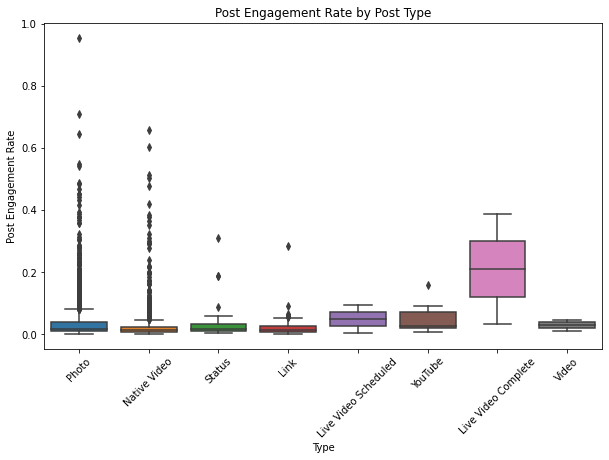

In [151]:
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x='Type',y='Post Engagement Rate', data=big)
plt.title('Post Engagement Rate by Post Type')
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
plt.show()

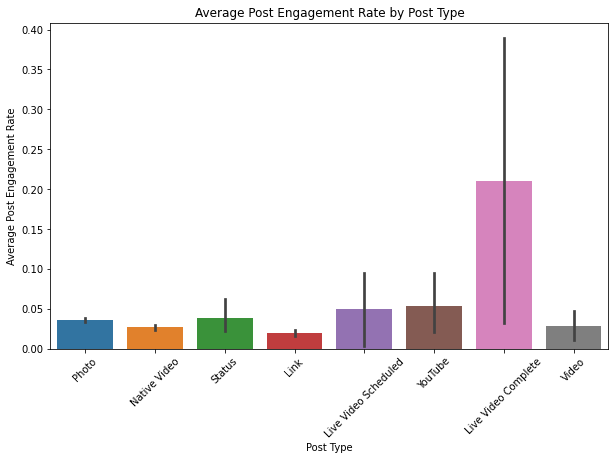

In [152]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Type', y='Post Engagement Rate', data=big)
plt.title('Average Post Engagement Rate by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Post Engagement Rate')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)
plt.show()

## Feature 5 : Vectorization and vocabulary analysis

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

messages = df['processed_text']

vectorizer = TfidfVectorizer(max_features=1000,min_df=3,max_df=0.9,stop_words='english',ngram_range=(1,2))  
X = vectorizer.fit_transform(messages)
X.shape

(15299, 1000)

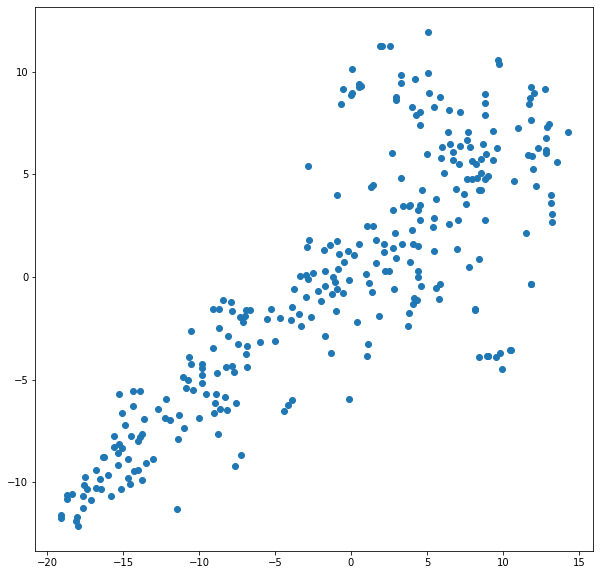

In [154]:
from gensim.models import FastText, Word2Vec

fast = FastText(messages,vector_size=100, min_count=5)
w2v = Word2Vec(messages, vector_size=100, min_count=5)

word_vectors = fast.wv.vectors


from sklearn.manifold import TSNE

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

tsne_vectors = tsne_model.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])
plt.show()

In [155]:
!{sys.executable} -m pip install umap-learn

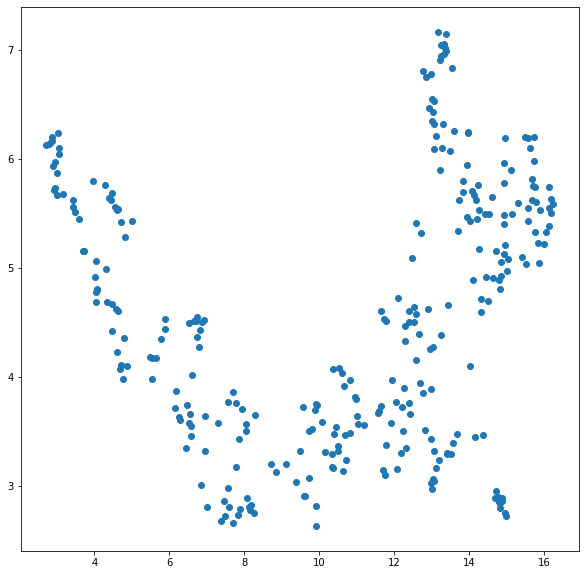

In [156]:
import umap.umap_ as umap

reducer = umap.UMAP()
umap_vectors = reducer.fit_transform(word_vectors)

plt.figure(figsize=(10,10))
plt.scatter(umap_vectors[:, 0], umap_vectors[:, 1])
plt.show()


In [157]:
df.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score', 'processed_text', 'Encoded Text',
       'Sentiment_Bert', 'lexicon_sent', 'lexicon_lab', 'Compound Lex Score',
       'text_length', 'hour', 'month'],
      dtype='object')

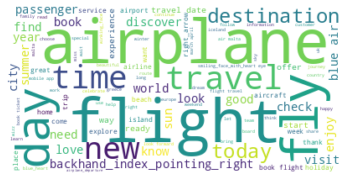

In [158]:
text = " ".join(msg for msg in df["processed_text"].astype(str))

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

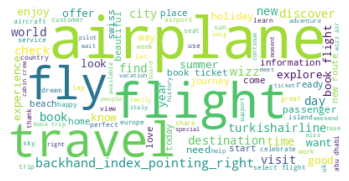

In [159]:
big = df[df['Page Name'].isin(bigger_airlines.index)]

text = " ".join(msg for msg in big["processed_text"].astype(str))
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [160]:
df.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Message', 'Description', 'Image Text',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Page Created Date', 'language', 'Overperforming Score', 'Size',
       'Post Engagement Rate', 'Post Popularity Weighted Score',
       'Post Scaled Popularity Score', 'processed_text', 'Encoded Text',
       'Sentiment_Bert', 'lexicon_sent', 'lexicon_lab', 'Compound Lex Score',
       'text_length', 'hour', 'month'],
      dtype='object')

In [161]:
df['processed_text'].isna().sum()

0

In [189]:
# df_pos = df[df['Sentiment_Bert'] == 'Positive']
# df_neg = df[df['Sentiment_Bert'] == 'Negative']

df_pos = df[df['lexicon_lab']=='Positive']
df_neu = df[df['lexicon_lab']=='Neutral']
df_neg = df[df['lexicon_lab']=='Negative']



from nltk.tokenize import word_tokenize

df_pos['tokens'] = df_pos['processed_text'].apply(word_tokenize)
df_neg['tokens'] = df_neg['processed_text'].apply(word_tokenize)
df['tokens'] = df['processed_text'].apply(word_tokenize)

In [190]:
df['tokens'].isna().sum()

0

In [191]:
df.shape

(15299, 306)

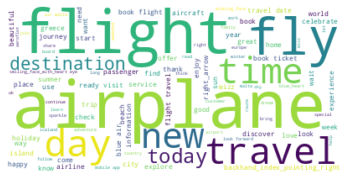

In [165]:
text = " ".join(msg for msg in df_pos["processed_text"].astype(str))
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

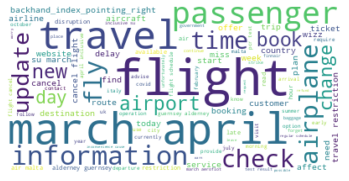

In [166]:
text = " ".join(msg for msg in df_neg["processed_text"].astype(str))
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [167]:
from collections import Counter

word_pos_count = Counter(word for tokens in df_pos['tokens'] for word in tokens)
word_neg_count = Counter(word for tokens in df_neg['tokens'] for word in tokens)

print(word_pos_count.most_common(10))
print(word_neg_count.most_common(10))

[('--', 6758), ('flight', 5484), ('travel', 3840), ('airplane', 3465), ('book', 2989), ('new', 2264), ('fly', 2193), ('time', 1965), ('destination', 1905), ('day', 1739)]
[('--', 1227), ('flight', 848), ('march', 679), ('—', 427), ('travel', 419), ('april', 366), ('passenger', 235), ('23', 220), ('–', 210), ('time', 200)]


In [168]:
def count_pos_words(text):
    words = word_tokenize(text)
    return sum(word in word_pos_count for word in words)

def count_neg_words(text):
    words = word_tokenize(text)
    return sum(word in word_neg_count for word in words)

df['positive_word_count'] = df['processed_text'].apply(count_pos_words)
df['negative_word_count'] = df['processed_text'].apply(count_neg_words)

correlation_matrix = df[['positive_word_count', 'negative_word_count', 'Post Engagement Rate']].corr()
correlation_matrix


positive_word_count  negative_word_count  \
positive_word_count              1.000000             0.974401   
negative_word_count              0.974401             1.000000   
Post Engagement Rate             0.019748             0.012131   

                      Post Engagement Rate  
positive_word_count               0.019748  
negative_word_count               0.012131  
Post Engagement Rate              1.000000

In [169]:
pos_words = set(word for tokens in df_pos['tokens'] for word in tokens)
neg_words = set(word for tokens in df_neg['tokens'] for word in tokens)
common = pos_words.intersection(neg_words)

word_pos_filtered = word_pos_count
word_neg_filtered = word_neg_count

for word in common:
    del word_pos_filtered[word]
    del word_neg_filtered[word]


def remove_common_words(text):
    return " ".join([word for word in text.split() if word not in common])

df_pos['processed_text_uncommon'] = df_pos['processed_text'].apply(remove_common_words)
df_neg['processed_text_uncommon'] = df_neg['processed_text'].apply(remove_common_words)

display(df_neg)


<ipython-input-169-dd1edfa7d140>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['processed_text_uncommon'] = df_pos['processed_text'].apply(remove_common_words)
<ipython-input-169-dd1edfa7d140>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['processed_text_uncommon'] = df_neg['processed_text'].apply(remove_common_words)


Page Name Page Admin Top Country        Page Created  \
2023                SunExpress                     DE 2018-11-19 14:54:00   
3858                  Blue Air                     RO 2009-02-09 14:08:00   
16603                airBaltic                     LV 2009-04-28 16:51:00   
14608                  Fly UIA                     UA 2010-07-27 07:08:00   
9078            SkyUp Airlines                     UA 2018-11-06 10:28:00   
...                        ...                    ...                 ...   
9153                 Eurowings                     DE 2018-07-18 09:07:00   
18507               Aer Lingus                     GB 2012-10-23 09:08:00   
18735  Jet2.com & Jet2holidays                     GB 2008-03-17 16:40:00   
28566         Croatia Airlines                     HR 2010-03-24 11:28:00   
15688                Transavia                     NL 2014-01-09 10:04:00   

       Likes at Posting  Followers at Posting Post Created Date  \
2023           424826.0              425411.0        2020-01-06   
3858           571620.0              578143.0        2020-01-08   
16603          369893.0              382584.0        2020-01-09   
14608          195111.0              208710.0        2020-01-10   
9078            25533.0               32000.0        2020-01-12   
...                 ...                   ...               ...   
9153           968123.0              979582.0        2022-12-03   
18507          504829.0              510229.0        2022-12-04   
18735          674480.0              693769.0        2022-12-04   
28566          154265.0              156414.0        2022-12-05   
15688         1287472.0             1289753.0        2022-12-06   

      Post Created Time          Type  Total Interactions  Likes  ...  \
2023           04:46:54         Photo               627.0    332  ...   
3858           02:00:00         Photo               110.0     42  ...   
16603          05:08:52  Native Video              1784.0   1326  ...   
14608          07:44:01         Photo               147.0     70  ...   
9078           05:22:10         Photo               115.0     71  ...   
...                 ...           ...                 ...    ...  ...   
9153           18:05:05         Photo                96.0     45  ...   
18507          11:49:37         Photo               507.0    188  ...   
18735          15:00:03         Photo               466.0    272  ...   
28566          03:21:57         Photo                56.0     52  ...   
15688          04:50:02         Photo                61.0     38  ...   

                      Encoded Text  Sentiment_Bert  \
2023   [input_ids, attention_mask]        Negative   
3858   [input_ids, attention_mask]        Negative   
16603  [input_ids, attention_mask]        Negative   
14608  [input_ids, attention_mask]        Negative   
9078   [input_ids, attention_mask]        Negative   
...                            ...             ...   
9153   [input_ids, attention_mask]        Negative   
18507  [input_ids, attention_mask]        Negative   
18735  [input_ids, attention_mask]        Negative   
28566  [input_ids, attention_mask]        Negative   
15688  [input_ids, attention_mask]        Negative   

                                            lexicon_sent  lexicon_lab  \
2023   {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...     Negative   
3858   {'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...     Negative   
16603  {'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...     Negative   
14608  {'neg': 0.171, 'neu': 0.722, 'pos': 0.106, 'co...     Negative   
9078   {'neg': 0.078, 'neu': 0.859, 'pos': 0.062, 'co...     Negative   
...                                                  ...          ...   
9153   {'neg': 0.198, 'neu': 0.617, 'pos': 0.185, 'co...     Negative   
18507  {'neg': 0.149, 'neu': 0.745, 'pos': 0.106, 'co...     Negative   
18735  {'neg': 0.235, 'neu': 0.537, 'pos': 0.228, 'co...     Negative   
28566  {'neg': 0.128, 'neu': 0.833,

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

positive_text = ' '.join(df_pos['processed_text_uncommon'])
negative_text = ' '.join(df_neg['processed_text_uncommon'])

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform([positive_text, negative_text])
feature_array = np.array(vectorizer.get_feature_names())

tfidf_sorting_pos = np.argsort(tfidf_matrix.toarray()[0]).flatten()[::-1]
tfidf_sorting_neg = np.argsort(tfidf_matrix.toarray()[1]).flatten()[::-1]

top_words_pos = feature_array[tfidf_sorting_pos][:10]
top_words_neg = feature_array[tfidf_sorting_neg][:10]

print(top_words_pos)
print(top_words_neg)

['sparkle' 'exciting' 'beauty' 'stunning' 'sunny' 'inspire' 'favorite'
 'winner' 'award' 'nice']
['17' '18' '19' '20' 'atyrau' 'kostanay' 'shymkent' 'karagandy' 'aktau'
 'aktobe']


In [171]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel


df_pos['tokens_uncommon'] = df_pos['processed_text_uncommon'].apply(word_tokenize)
df_neg['tokens_uncommon'] = df_neg['processed_text_uncommon'].apply(word_tokenize)

dictionary_pos = Dictionary(df_pos['tokens_uncommon'].tolist())
dictionary_neg = Dictionary(df_neg['tokens_uncommon'].tolist())

bow_pos = [dictionary_pos.doc2bow(token) for token in df_pos['tokens_uncommon']]
bow_neg = [dictionary_neg.doc2bow(token) for token in df_neg['tokens_uncommon']]

lda_model_pos = LdaModel(bow_pos, num_topics=3, id2word=dictionary_pos, passes=15)
lda_model_neg = LdaModel(bow_neg, num_topics=3, id2word=dictionary_neg, passes=15)

topics_pos = lda_model_pos.print_topics(num_words=7)
for topic in topics_pos:
    print(topic)

topics_neg = lda_model_neg.print_topics(num_words=7)
for topic in topics_neg:
    print(topic)



<ipython-input-171-875c15f629d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['tokens_uncommon'] = df_pos['processed_text_uncommon'].apply(word_tokenize)
<ipython-input-171-875c15f629d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['tokens_uncommon'] = df_neg['processed_text_uncommon'].apply(word_tokenize)


(0, '0.007*"sunny" + 0.007*"exciting" + 0.005*"award" + 0.005*"nice" + 0.005*"women" + 0.004*"benefit" + 0.004*"sparkle"')
(1, '0.260*"--" + 0.008*"-" + 0.007*"@" + 0.004*"yes" + 0.004*"mykonos" + 0.004*"nico_veraortiz" + 0.004*"gozo"')
(2, '0.012*"@" + 0.007*"&" + 0.006*"favorite" + 0.006*"fun" + 0.006*"sparkle" + 0.006*"stunning" + 0.005*"t"')
(0, '0.014*"17/18" + 0.009*"." + 0.008*"19/20" + 0.008*"atyrau" + 0.008*"atomics" + 0.007*"@" + 0.007*"aktau"')
(1, '0.036*"@" + 0.020*"➢" + 0.014*"&" + 0.010*"a" + 0.010*"q" + 0.006*"t" + 0.005*"bookings"')
(2, '0.547*"--" + 0.014*"-" + 0.002*"2452/260" + 0.002*"11jun" + 0.002*"violation" + 0.002*"bagel" + 0.002*"102/103"')


In [172]:
def get_dominant_topic(bow_doc, lda_model):
    topic_probabilities = lda_model.get_document_topics(bow_doc)
    dominant_topic = sorted(topic_probabilities, key=lambda x: -x[1])[0][0]
    return dominant_topic

In [173]:
df_pos['dominant_topic'] = [get_dominant_topic(dictionary_pos.doc2bow(tokens), lda_model_pos) for tokens in df_pos['tokens']]
df_neg['dominant_topic'] = [get_dominant_topic(dictionary_neg.doc2bow(tokens), lda_model_neg) for tokens in df_neg['tokens']]

<ipython-input-173-468591e84619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['dominant_topic'] = [get_dominant_topic(dictionary_pos.doc2bow(tokens), lda_model_pos) for tokens in df_pos['tokens']]
<ipython-input-173-468591e84619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['dominant_topic'] = [get_dominant_topic(dictionary_neg.doc2bow(tokens), lda_model_neg) for tokens in df_neg['tokens']]


In [174]:
pos_topic_engagement = df_pos.groupby('dominant_topic')['Post Engagement Rate'].mean().sort_values(ascending=False)
neg_topic_engagement = df_neg.groupby('dominant_topic')['Post Engagement Rate'].mean().sort_values(ascending=False)

print("Positive Topic Engagement:")
print(pos_topic_engagement)
print("\nNegative Topic Engagement:")
print(neg_topic_engagement)

print(df_neg['Post Engagement Rate'].max())
# print(df.columns)

Positive Topic Engagement:
dominant_topic
1    0.149098
0    0.136375
2    0.130881
Name: Post Engagement Rate, dtype: float64

Negative Topic Engagement:
dominant_topic
1    0.149530
0    0.133906
2    0.123826
Name: Post Engagement Rate, dtype: float64
0.9878668742701442


In [175]:
def get_positive_uncommon_words(tokens):
    return [word for word in tokens if word in dictionary_pos.token2id]

def get_negative_uncommon_words(tokens):
    return [word for word in tokens if word in dictionary_neg.token2id]

df['uncommon_positive_tokens'] = df['tokens'].apply(get_positive_uncommon_words)
df['uncommon_negative_tokens'] = df['tokens'].apply(get_negative_uncommon_words)

df['uncommon_positive_tokens'] = df['uncommon_positive_tokens'].apply(' '.join)
df['uncommon_negative_tokens'] = df['uncommon_negative_tokens'].apply(' '.join)

display(df.head())

Page Name Page Admin Top Country        Page Created  \
4223                   Vueling                     ES 2011-05-04 11:16:00   
16371          Virgin Atlantic                     GB 2008-05-01 01:48:00   
10206  Jet2.com & Jet2holidays                     GB 2008-03-17 16:40:00   
21281                Air Malta                     MT 2010-10-05 11:47:00   
16859        Austrian Airlines                     AT 2010-02-03 10:09:00   

       Likes at Posting  Followers at Posting Post Created Date  \
4223          1234220.0             1235929.0        2020-01-01   
16371          647660.0              644774.0        2020-01-01   
10206          542238.0              544469.0        2020-01-01   
21281          163696.0              164445.0        2020-01-01   
16859          393319.0              390290.0        2020-01-01   

      Post Created Time          Type  Total Interactions  Likes  ...  \
4223           06:00:00  Native Video               225.0     49  ...   
16371          06:00:36         Photo              4386.0   3330  ...   
10206          03:30:00  Native Video               423.0    181  ...   
21281          11:53:46         Photo               244.0    215  ...   
16859          08:48:47         Photo              1234.0   1032  ...   

       lexicon_lab  Compound Lex Score  text_length  hour  month  \
4223      Positive              0.8860           16     6      1   
16371     Positive              0.9652           35     6      1   
10206     Positive              0.9403           31     3      1   
21281     Positive              0.5719           31    11      1   
16859     Positive              0.8074           19     8      1   

                                                  tokens  positive_word_count  \
4223   [happy, new, year, yellow_heart, 2020, fill, l...                   16   
16371  [happy, new, year, red_heart, ​, ​, hear, love...                   35   
10206  [hello, 2020, bonus, windowwonderland, giveawa...                   33   
21281  [massive, atmosphere, valletta, night, celebra...                   31   
16859  [decide, want, 2020, erik, find, happy, place,...                   19   

       negative_word_count                           uncommon_positive_tokens  \
4223                    15                                       year sparkle   
16371                   28  year ​ ​ lovely violet inspire complimentary e...   
10206                   26  bonus windowwonderland landed win lifetime jet...   
21281                   20  clapping_hand g7 arti kultura maltaphotography...   
16859                   13  erik mont blanc embraer 195 capped_mountain ne...   

       uncommon_negative_tokens  
4223                             
16371                     ​ ​ ​  
10206                     t & c  
21281                            
16859                            

[5 rows x 45 columns]

In [176]:
!{sys.executable} -m pip install bertopic

In [177]:
from bertopic import BERTopic

topic_model_pos = BERTopic(language="english", calculate_probabilities=True)
topic_model_neg = BERTopic(language="english", calculate_probabilities=True)
topic_model_neu = BERTopic(language="english", calculate_probabilities=True)


topics_pos, _ = topic_model_pos.fit_transform(df_pos['processed_text'])
topics_neg, _ = topic_model_neg.fit_transform(df_neg['processed_text'])
topics_neu, _ = topic_model_neu.fit_transform(df_neu['processed_text'])


# topic_freq_pos = topic_model_pos.get_topic_info()
# print(topic_freq_pos.head(10))

# topic_freq_neg = topic_model_neg.get_topic_info()
# print(topic_freq_neg.head(10))


In [178]:
topic_freq_pos = topic_model_pos.get_topic_info(); topic_freq_pos.head(10)


Topic  Count                                        Name  \
0     -1   4960                 -1_airplane_new_travel_book   
1      0    151             0_corsica_tourism_ajaccio_calvi   
2      1    148           1_azores_unitedkingdom_mais_saiba   
3      2    142                   2_career_pilot_crew_cabin   
4      3    141  3_fuel_sustainable_sustainability_emission   
5      4    138                   4_select_discount_20_wizz   
6      5    138                 5_italy_sicily_italian_rome   
7      6    131               6_valentine_love_romantic_day   
8      7    128                    7_airserbia_na_da_serbia   
9      8    112                 8_bucharest_blue_euro_bacau   

                                      Representation  \
0  [airplane, new, travel, book, flight, destinat...   
1  [corsica, tourism, ajaccio, calvi, bastia, air...   
2  [azores, unitedkingdom, mais, saiba, sata, air...   
3  [career, pilot, crew, cabin, join, academy, ap...   
4  [fuel, sustainable, sustainability, emission, ...   
5  [select, discount, 20, wizz, backhandindexpoin...   
6  [italy, sicily, italian, rome, sardinia, naple...   
7  [valentine, love, romantic, day, twohearts, re...   
8  [airserbia, na, da, serbia, za, belgrade, flya...   
9  [bucharest, blue, euro, bacau, otopeni, weekly...   

                                 Representative_Docs  
0  [ready summer book seat 20 20 today flight tra...  
1  [automobile sport_utility_vehicle road trip co...  
2  [saiba mais united_kingdom sata imagine far of...  
3  [look fast track career good news wizz ramp pi...  
4  [british airways shortlist alongside partner g...  
5  [20 ticket fare today wizz grab opportunity bo...  
6  [summer 22 look forward .. stunning sardinia i...  
7  [musical_note need love musical_note happy val...  
8  [naš a319 pravi pauzu za dana spremajući se za...  
9  [june minute buy 1 1 free swimsuit straw hat s...

In [179]:
topic_freq_neu = topic_model_neu.get_topic_info(); topic_freq_neu.head(10)

Topic  Count                                               Name  \
0     -1    679                      -1_flight_travel_new_airplane   
1      0    121     0_camerawithflash_camera_wingwednesday_capture   
2      1     89             1_airplane_airplanedeparture_gabon_fly   
3      2     79             2_test_covid19_information_coronavirus   
4      3     72              3_croatiaairlines_discover_camera_fly   
5      4     69  4_turkishairline_istanbul_turkishairlines_airp...   
6      5     59   5_blueair_thebetterwaytofly_flyblueair_flybetter   
7      6     59                   6_flight_london_amsterdam_prague   
8      7     54                        7_seat_book_select_discount   
9      8     49        8_backhandindexpointingdown_order_meal_menu   

                                      Representation  \
0  [flight, travel, new, airplane, book, fly, air...   
1  [camerawithflash, camera, wingwednesday, captu...   
2  [airplane, airplanedeparture, gabon, fly, week...   
3  [test, covid19, information, coronavirus, pass...   
4  [croatiaairlines, discover, camera, fly, lugar...   
5  [turkishairline, istanbul, turkishairlines, ai...   
6  [blueair, thebetterwaytofly, flyblueair, flybe...   
7  [flight, london, amsterdam, prague, june, resu...   
8  [seat, book, select, discount, sale, 2021, oct...   
9  [backhandindexpointingdown, order, meal, menu,...   

                                 Representative_Docs  
0  [early bird catch worm ... flight winking_face...  
1  [sunset sunset larnaca airport camera_with_fla...  
2  [arrive gabon libreville gabon afrijet airplan...  
3  [today traveler covid-19 test directly lux air...  
4  [fly croatia view smiling_face_with_heart eye ...  
5  [airplane think journey istanbul airport guess...  
6  [magnifying_glass_tilted_left palm_tree blueai...  
7  [receive necessary permission airbaltic plan r...  
8  [travel discount 20 select flight depart 31 oc...  
9  [sandwich pre order meal service available fli...

In [180]:
topic_freq_neg = topic_model_neg.get_topic_info(); topic_freq_neg.head(10)

Topic  Count                                               Name  \
0     -1    303                      -1_airplane_flight_travel_fly   
1      0    143                 0_alderney_guernsey_weather_flight   
2      1     83                         1_test_negative_pcr_result   
3      2     34                           2_corsica_city_war_tower   
4      3     31  3_away_airplanedeparture_checkmark_smilingface...   
5      4     26                4_restriction_travel_flight_country   
6      5     25      5_fire_select_backhandindexpointingright_book   
7      6     24                                6_march_april_23_su   
8      7     24                      7_azerbaijan_baku_azal_flight   
9      8     23                         8_malta_air_maltese_travel   

                                      Representation  \
0  [airplane, flight, travel, fly, book, check, t...   
1  [alderney, guernsey, weather, flight, cancel, ...   
2  [test, negative, pcr, result, passenger, covid...   
3  [corsica, city, war, tower, world, discover, n...   
4  [away, airplanedeparture, checkmark, smilingfa...   
5  [restriction, travel, flight, country, new, fl...   
6  [fire, select, backhandindexpointingright, boo...   
7  [march, april, 23, su, aeroflot, 18, 16, 30, 1...   
8  [azerbaijan, baku, azal, flight, heydar, aliye...   
9  [malta, air, maltese, travel, dep, arr, 356, q...   

                                 Representative_Docs  
0  [break news airplane bucharest london heathrow...  
1  [alderney schedule disruption ----------------...  
2  [london united_kingdom entry regulation uk eas...  
3  [malta history buff sure island country lavish...  
4  [smell like summer sun week 11 destination € 9...  
5  [country implement new travel restriction fly ...  
6  [20 member fire 20 flight book today wizz disc...  
7  [update information change aeroflot flight sch...  
8  [azerbaijan airplane azal resume flight baku n...  
9  [𝗔𝗶𝗿 𝗠𝗮𝗹𝘁𝗮 𝘀𝘂𝘀𝗽𝗲𝗻𝗱𝘀 𝗮𝗹𝗹 𝗳𝗹𝗶𝗴𝗵𝘁𝘀 𝗯𝗲𝘁𝘄𝗲𝗲𝗻 𝗠𝗮𝗹𝘁𝗮 ...

In [181]:
df_pos['topics'] = topics_pos
df_neg['topics'] = topics_neg
df_neu['topics'] = topics_neu

df_pos['topics'] = 'pos_' + df_pos['topics'].astype(str)
df_neg['topics'] = 'neg_' + df_neg['topics'].astype(str)
df_neu['topics'] = 'neu_' + df_neu['topics'].astype(str)

df = pd.concat([df_pos, df_neg, df_neu])
display(df.head())

df_topics_one_hot = pd.get_dummies(df['topics'], prefix='topic')

df = pd.concat([df, df_topics_one_hot], axis=1)
display(df.head())
display(df.shape)

Page Name Page Admin Top Country        Page Created  \
4223                   Vueling                     ES 2011-05-04 11:16:00   
16371          Virgin Atlantic                     GB 2008-05-01 01:48:00   
10206  Jet2.com & Jet2holidays                     GB 2008-03-17 16:40:00   
21281                Air Malta                     MT 2010-10-05 11:47:00   
16859        Austrian Airlines                     AT 2010-02-03 10:09:00   

       Likes at Posting  Followers at Posting Post Created Date  \
4223          1234220.0             1235929.0        2020-01-01   
16371          647660.0              644774.0        2020-01-01   
10206          542238.0              544469.0        2020-01-01   
21281          163696.0              164445.0        2020-01-01   
16859          393319.0              390290.0        2020-01-01   

      Post Created Time          Type  Total Interactions  Likes  ...  \
4223           06:00:00  Native Video               225.0     49  ...   
16371          06:00:36         Photo              4386.0   3330  ...   
10206          03:30:00  Native Video               423.0    181  ...   
21281          11:53:46         Photo               244.0    215  ...   
16859          08:48:47         Photo              1234.0   1032  ...   

       lexicon_lab  Compound Lex Score  text_length  hour  month  \
4223      Positive              0.8860           16     6      1   
16371     Positive              0.9652           35     6      1   
10206     Positive              0.9403           31     3      1   
21281     Positive              0.5719           31    11      1   
16859     Positive              0.8074           19     8      1   

                                                  tokens  \
4223   [happy, new, year, yellow_heart, 2020, fill, l...   
16371  [happy, new, year, red_heart, ​, ​, hear, love...   
10206  [hello, 2020, bonus, windowwonderland, giveawa...   
21281  [massive, atmosphere, valletta, night, celebra...   
16859  [decide, want, 2020, erik, find, happy, place,...   

                                 processed_text_uncommon  \
4223                                             sparkle   
16371  lovely violet inspire complimentary easone 202...   
10206  bonus windowwonderland landed lifetime jet2sho...   
21281  clapping_hand g7 arti kultura maltaphotography...   
16859        erik mont blanc 195 capped_mountain newyear   

                                         tokens_uncommon  dominant_topic  \
4223                                           [sparkle]             0.0   
16371  [lovely, violet, inspire, complimentary, eason...             2.0   
10206  [bonus, windowwonderland, landed, lifetime, je...             2.0   
21281  [clapping_hand, g7, arti, kultura, maltaphotog...             2.0   
16859  [erik, mont, blanc, 195, capped_mountain, newy...             2.0   

        topics  
4223    pos_-1  
16371   pos_-1  
10206   pos_-1  
21281   pos_72  
16859  pos_167  

[5 rows x 45 columns]

Page Name Page Admin Top Country        Page Created  \
4223                   Vueling                     ES 2011-05-04 11:16:00   
16371          Virgin Atlantic                     GB 2008-05-01 01:48:00   
10206  Jet2.com & Jet2holidays                     GB 2008-03-17 16:40:00   
21281                Air Malta                     MT 2010-10-05 11:47:00   
16859        Austrian Airlines                     AT 2010-02-03 10:09:00   

       Likes at Posting  Followers at Posting Post Created Date  \
4223          1234220.0             1235929.0        2020-01-01   
16371          647660.0              644774.0        2020-01-01   
10206          542238.0              544469.0        2020-01-01   
21281          163696.0              164445.0        2020-01-01   
16859          393319.0              390290.0        2020-01-01   

      Post Created Time          Type  Total Interactions  Likes  ...  \
4223           06:00:00  Native Video               225.0     49  ...   
16371          06:00:36         Photo              4386.0   3330  ...   
10206          03:30:00  Native Video               423.0    181  ...   
21281          11:53:46         Photo               244.0    215  ...   
16859          08:48:47         Photo              1234.0   1032  ...   

       topic_pos_90  topic_pos_91  topic_pos_92  topic_pos_93  topic_pos_94  \
4223              0             0             0             0             0   
16371             0             0             0             0             0   
10206             0             0             0             0             0   
21281             0             0             0             0             0   
16859             0             0             0             0             0   

       topic_pos_95  topic_pos_96  topic_pos_97  topic_pos_98  topic_pos_99  
4223              0             0             0             0             0  
16371             0             0             0             0             0  
10206             0             0             0             0             0  
21281             0             0             0             0             0  
16859             0             0             0             0             0  

[5 rows x 305 columns]

(15299, 305)

# Combining Features:

In [182]:
feature_1 = df['lexicon_lab']
feature_2 = df['text_length']
feature_3 = df['hour']
feature_3_2 = df['month']
feature_4 = df['Type']
Topics = df.filter(like='topic_')
Topics

topic_neg_-1  topic_neg_0  topic_neg_1  topic_neg_10  topic_neg_11  \
4223              0            0            0             0             0   
16371             0            0            0             0             0   
10206             0            0            0             0             0   
21281             0            0            0             0             0   
16859             0            0            0             0             0   
...             ...          ...          ...           ...           ...   
21815             0            0            0             0             0   
9890              0            0            0             0             0   
4152              0            0            0             0             0   
29450             0            0            0             0             0   
23720             0            0            0             0             0   

       topic_neg_12  topic_neg_13  topic_neg_14  topic_neg_15  topic_neg_16  \
4223              0             0             0             0             0   
16371             0             0             0             0             0   
10206             0             0             0             0             0   
21281             0             0             0             0             0   
16859             0             0             0             0             0   
...             ...           ...           ...           ...           ...   
21815             0             0             0             0             0   
9890              0             0             0             0             0   
4152              0             0             0             0             0   
29450             0             0             0             0             0   
23720             0             0             0             0             0   

       ...  topic_pos_90  topic_pos_91  topic_pos_92  topic_pos_93  \
4223   ...             0             0             0             0   
16371  ...             0             0             0             0   
10206  ...             0             0             0             0   
21281  ...             0             0             0             0   
16859  ...             0             0             0             0   
...    ...           ...           ...           ...           ...   
21815  ...             0             0             0             0   
9890   ...             0             0             0             0   
4152   ...             0             0             0             0   
29450  ...             0             0             0             0   
23720  ...             0             0             0             0   

       topic_pos_94  topic_pos_95  topic_pos_96  topic_pos_97  topic_pos_98  \
4223              0             0             0             0             0   
16371             0             0             0             0             0   
10206             0             0             0             0             0   
21281             0             0             0             0             0   
16859             0             0             0             0             0   
...             ...           ...           ...           ...           ...   
21815             0             0             0             0             0   
9890              0             0             0             0             0   
4152              0             0             0             0             0   
29450             0             0             0             0             0   
23720             0             0             0             0             0   

       topic_pos_99  
4223              0  
16371             0  
10206             0  
21281             0  
16859             0  
...             ...  
21815             0  
9890              0  
4152              0  
29450             0  
23720             0  

[15299 rows x 260 columns]

### Vectorization feature:

In [183]:
df.columns

Index(['Page Name', 'Page Admin Top Country', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created Date',
       'Post Created Time', 'Type', 'Total Interactions', 'Likes',
       ...
       'topic_pos_90', 'topic_pos_91', 'topic_pos_92', 'topic_pos_93',
       'topic_pos_94', 'topic_pos_95', 'topic_pos_96', 'topic_pos_97',
       'topic_pos_98', 'topic_pos_99'],
      dtype='object', length=305)

In [184]:
!{sys.executable} -m pip install sentence-transformers

In [185]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
df['bert_vec'] = df['processed_text'].apply(lambda x: model.encode([x]))

In [186]:
df.shape

(15299, 306)

In [187]:
df['tokens'].isna().sum()

1983

In [192]:
from gensim.models import FastText

fast = FastText(df['tokens'], vector_size=100, min_count=3)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000,min_df=3,max_df=0.9,stop_words='english',ngram_range=(1,2))  
tfidf = vectorizer.fit_transform(df['processed_text'])


In [193]:
feature_5 = df['bert_vec']

In [194]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
df_copy['bert_vec'] = df_copy['bert_vec'].apply(lambda x: x[0])


le = LabelEncoder()
df_copy['feature_1'] = le.fit_transform(df_copy['lexicon_lab'])
df_copy['feature_4'] = le.fit_transform(df_copy['Type'])

bert_features = pd.DataFrame(df_copy['bert_vec'].tolist(), columns=[f'bert_{i}' for i in range(df_copy['bert_vec'].iloc[0].shape[0])])

df_copy = df_copy.drop(columns=['bert_vec'])
bert_features.index = df_copy.index
df_copy = pd.concat([df_copy, bert_features], axis=1)


def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

wv_features = averaged_word_vectorizer(corpus=df['tokens'], model=fast, num_features=100)
fasttext_features = pd.DataFrame(wv_features, columns=[f'fasttext_{i}' for i in range(wv_features.shape[1])])
fasttext_features.index = df_copy.index
# df_copy = pd.concat([df_copy, fasttext_features], axis=1)
# X = fasttext_features

# df_copy = pd.concat([df_copy, fasttext_features], axis=1)




# word_vectors = fast.wv.vectors
# fasttext_features = pd.DataFrame(word_vectors, columns=[f'fasttext_{i}' for i in range(word_vectors.shape[1])])
# fasttext_features.index = df_copy.index
# df_copy = pd.concat([df_copy, fasttext_features], axis=1)


tfidf_dense = tfidf.todense()
tfidf_features = pd.DataFrame(tfidf_dense, columns=vectorizer.get_feature_names())
tfidf_features.index = df_copy.index
# df_copy = pd.concat([df_copy, tfidf_features], axis=1)

# X = tfidf_features
# df_copy = pd.concat([df_copy, tfidf_features], axis=1)


In [195]:
df_copy['feature_1']

4223     2
16371    2
10206    2
21281    2
16859    2
        ..
21815    1
9890     1
4152     1
29450    1
23720    1
Name: feature_1, Length: 15299, dtype: int64

In [196]:
# X = df_copy[['feature_1', 'text_length', 'hour', 'month', 'feature_4'] + [f'bert_{i}' for i in range(768)]]
# X = pd.concat([X, Topics], axis=1)

# X = df_copy[['feature_1','text_length','hour','month', 'feature_4']]
# X = pd.concat([X, Topics], axis=1)
# X = Topics.copy()

# X = df_copy[['hour','month']]


X = df_copy['feature_1'].values.reshape(-1, 1)
# X = Topics

# X = bert_features
# X = fasttext_features
# X = tfidf_features

X

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]])

In [197]:
bert_features.shape[1]

768

# Prediction (Using Regresssion) 

In [198]:
from sklearn.model_selection import train_test_split
y = df_copy['Post Engagement Rate']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


# coef = pd.Series(lin_reg.coef_, index = X.columns)
# print(coef)


Mean Squared Error: 0.04236648367704773
Mean Absolute Error: 0.14765037372385065
Root Mean Squared Error: 0.20583120190352028


In [199]:
X_train.shape

(10709, 1)

In [200]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# scaler = StandardScaler()

# svr = SVR()

# pipeline = Pipeline(steps=[('s',scaler), ('m',svr)])

# param_grid = {'m__C': [0.1, 1, 10, 100, 1000],  
#               'm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'm__kernel': ['rbf']}  

# grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 1)

# grid.fit(X_train, y_train)

# print(grid.best_params_)

# y_pred = grid.predict(X_test)

# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', rmse)


In [201]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 0.04319698387643298
Mean Absolute Error: 0.13710432095766065
Root Mean Squared Error: 0.20783884111597856


In [202]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss='mean_squared_error', optimizer=optimizer)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test_scaled)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


Epoch 1/100
268/268 [==============================] - 0s 2ms/step - loss: 0.0435 - val_loss: 0.0447
Epoch 2/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0421 - val_loss: 0.0443
Epoch 3/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.0443
Epoch 4/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.0442
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0445
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0441
Epoch 7/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0442
Epoch 8/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.0442
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0445
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0417 - val_lo

In [203]:
results = {
    'TF-IDF': {
        # 'Linear Regression': {'MSE': 4.42648020924074e+18, 'MAE': 50791513.195061445, 'RMSE': 2103920200.3024592},
               'SVR': {'MSE': 0.03035080553227339, 'MAE': 0.12949775789615942, 'RMSE': 0.17421482581075984},
               'NN': {'MSE': 0.03170219587120633, 'MAE': 0.09886153660135509, 'RMSE': 0.17805110466157276}},

    'FastText': {'Linear Regression': {'MSE': 0.03376526087688821, 'MAE': 0.12743296719317784, 'RMSE': 0.18375326086055782},
                 'SVR': {'MSE': 0.03386253124470233, 'MAE': 0.1251375528904031, 'RMSE': 0.1840177470916931},
                 'NN': {'MSE': 0.038350611199556864, 'MAE': 0.1252951622654471, 'RMSE': 0.1958331207930795}},

    'BERT': {'Linear Regression': {'MSE': 0.03180178480380192, 'MAE': 0.1268235351925761, 'RMSE': 0.17833054927241693},
             'SVR': {'MSE': 0.028561834838712375, 'MAE': 0.11954027436648487, 'RMSE': 0.16900246991897006},
             'NN': {'MSE': 0.03277667401602731, 'MAE': 0.10945424021581036, 'RMSE': 0.18104329320918605}}
}

results_vec_df = pd.DataFrame(results)

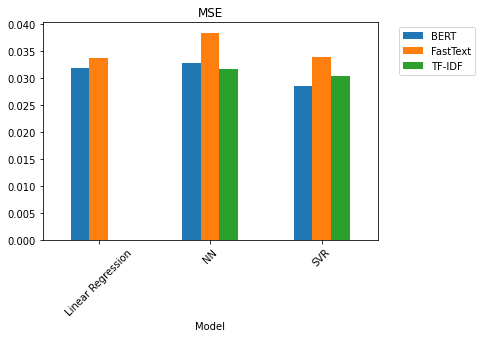

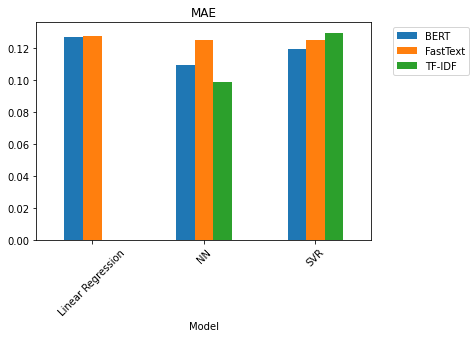

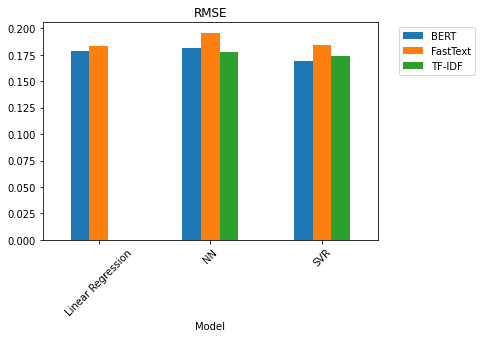

In [204]:
flat_data = {}
for vectorizer, models in results.items():
    for model, metrics in models.items():
        for metric, value in metrics.items():
            flat_data[(vectorizer, model, metric)] = value

s = pd.Series(flat_data)

df_results = s.reset_index()
df_results.columns = ['Vectorizer', 'Model', 'Metric', 'Value']

for metric in ['MSE', 'MAE', 'RMSE']:
    ax = df_results[df_results['Metric'] == metric].pivot(index='Model', columns='Vectorizer', values='Value').plot(kind='bar', title=metric)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
# results_df.T.plot(kind='bar', subplots=True, layout=(3,1), figsize=(10,15), sharex=False, title="Error Metrics for Different Models and Vectorizations")

In [205]:
df_results = pd.concat({(i,j): pd.DataFrame(results[i][j], index=[0]) 
                for i in results.keys() 
                for j in results[i].keys()}, 
                names=['Feature', 'Model'])

df_results= df_results.reset_index().drop('level_2', axis=1)
df_results=df_results.round(4)
df_results

Feature              Model     MSE     MAE    RMSE
0    TF-IDF                SVR  0.0304  0.1295  0.1742
1    TF-IDF                 NN  0.0317  0.0989  0.1781
2  FastText  Linear Regression  0.0338  0.1274  0.1838
3  FastText                SVR  0.0339  0.1251  0.1840
4  FastText                 NN  0.0384  0.1253  0.1958
5      BERT  Linear Regression  0.0318  0.1268  0.1783
6      BERT                SVR  0.0286  0.1195  0.1690
7      BERT                 NN  0.0328  0.1095  0.1810

In [206]:
results = {
    'All Features': {
        'Linear Regression': {'MSE': 0.03395576162702416, 'MAE': 0.12559179723205788, 'RMSE': 0.18427089196892754},
               'SVR': {'MSE': 0.035894676072495175, 'MAE': 0.124953932700959, 'RMSE': 0.189458903195},
               'NN': {'MSE': 0.03590639677437603, 'MAE': 0.12275232940660605, 'RMSE': 0.18948983290502958}},

    'Sentiment': {'Linear Regression': {'MSE': 0.04201918511172671, 'MAE': 0.14813513910641188, 'RMSE': 0.20498581685503686},
                 'SVR': {'MSE': 0.042125920314327485, 'MAE': 0.1345678503534945, 'RMSE': 0.20524599950870537},
                 'NN': {'MSE': 0.041928357474581054, 'MAE': 0.15064357975924192, 'RMSE': 0.20476415085307548}},

    'Length': {'Linear Regression': {'MSE': 0.040389783349756375, 'MAE': 0.14655168245451097, 'RMSE': 0.20097209594806034},
             'SVR': {'MSE': 0.0406814876803096, 'MAE': 0.1332972478834585, 'RMSE': 0.20169652371895158},
             'NN': {'MSE': 0.04021329860461005, 'MAE': 0.14451378559279984, 'RMSE': 0.20053253752099695}},
    
    'Time-series': {'Linear Regression': {'MSE': 0.041364545040704574, 'MAE': 0.14582195689484456, 'RMSE': 0.20338275502289907},
             'SVR': {'MSE': 0.043613071601710705, 'MAE': 0.1378622648589351, 'RMSE': 0.20883742864178037},
             'NN': {'MSE': 0.04125817340139726, 'MAE': 0.14229157476575147, 'RMSE': 0.20312108064254988}},
    
    'Type': {'Linear Regression': {'MSE': 0.03994868396527591, 'MAE': 0.14372725515040685, 'RMSE': 0.1998716687409096},
             'SVR': {'MSE': 0.044435531365253376, 'MAE': 0.1395640076843234, 'RMSE': 0.21079737039454116},
             'NN': {'MSE': 0.04115207161231442, 'MAE': 0.14577392473122172, 'RMSE': 0.20285973383674352}},
    
    'Topic': {'Linear Regression': {'MSE': 0.03403148615188331, 'MAE': 0.12597672489885053, 'RMSE': 0.1844762482052454},
             'SVR': {'MSE': 0.03630630022367812, 'MAE': 0.12951973125605803, 'RMSE': 0.19054212191449457},
             'NN': {'MSE': 0.03604212261787132, 'MAE': 0.12952558488712396, 'RMSE': 0.1898476361239181}}
}

results_df = pd.DataFrame(results)

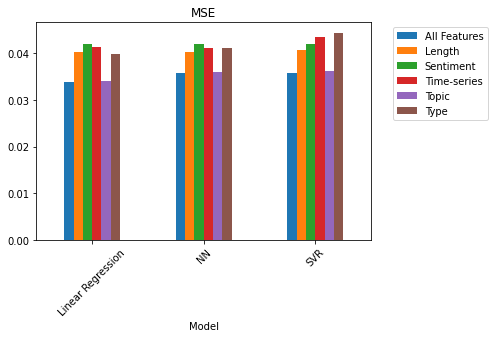

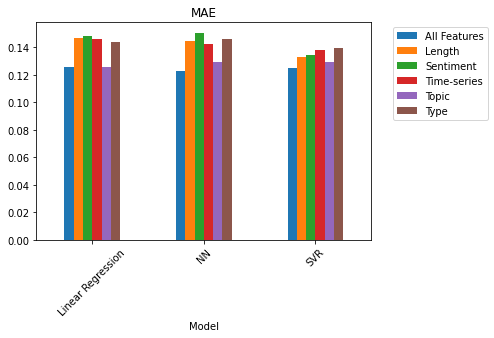

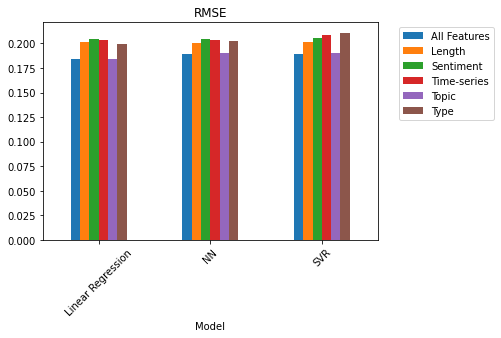

In [207]:
flat_data = {}
for vectorizer, models in results.items():
    for model, metrics in models.items():
        for metric, value in metrics.items():
            flat_data[(vectorizer, model, metric)] = value

s = pd.Series(flat_data)

df_eval = s.reset_index()
df_eval.columns = ['Vectorizer', 'Model', 'Metric', 'Value']

for metric in ['MSE', 'MAE', 'RMSE']:
    ax = df_eval[df_eval['Metric'] == metric].pivot(index='Model', columns='Vectorizer', values='Value').plot(kind='bar', title=metric)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.show()

In [208]:
df_results_fea = pd.concat({(i,j): pd.DataFrame(results[i][j], index=[0]) 
                for i in results.keys() 
                for j in results[i].keys()}, 
                names=['Feature', 'Model'])

df_results_fea = df_results_fea.reset_index().drop('level_2', axis=1)
df_results_fea=df_results_fea.round(4)
df_results_fea


Feature              Model     MSE     MAE    RMSE
0   All Features  Linear Regression  0.0340  0.1256  0.1843
1   All Features                SVR  0.0359  0.1250  0.1895
2   All Features                 NN  0.0359  0.1228  0.1895
3      Sentiment  Linear Regression  0.0420  0.1481  0.2050
4      Sentiment                SVR  0.0421  0.1346  0.2052
5      Sentiment                 NN  0.0419  0.1506  0.2048
6         Length  Linear Regression  0.0404  0.1466  0.2010
7         Length                SVR  0.0407  0.1333  0.2017
8         Length                 NN  0.0402  0.1445  0.2005
9    Time-series  Linear Regression  0.0414  0.1458  0.2034
10   Time-series                SVR  0.0436  0.1379  0.2088
11   Time-series                 NN  0.0413  0.1423  0.2031
12          Type  Linear Regression  0.0399  0.1437  0.1999
13          Type                SVR  0.0444  0.1396  0.2108
14          Type                 NN  0.0412  0.1458  0.2029
15         Topic  Linear Regression  0.0340  0.1260  0.1845
16         Topic                SVR  0.0363  0.1295  0.1905
17         Topic                 NN  0.0360  0.1295  0.1898